In [1]:
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
NX = 31
NY = 31
NL = 32
R = 3

if NL == 8:
    R = 1
    
    idxs_dir = [0, 4,  1,  5, 2,  6,  3,  7]
    cxs      = [1, 0, -1,  0, 1, -1, -1,  1]
    cys      = [0, 1,  0, -1, 1,  1, -1, -1]
elif NL == 16:
    R = 3
    
    idxs_dir = [0, 4,  1,  5, 2,  6,  3,  7, 8, 9, 10, 11, 12, 13, 14, 15]
    cxs      = [1, 0, -1,  0, 1, -1, -1,  1, 2, 1, -1, -2, -2, -1,  1,  2]
    cys      = [0, 1,  0, -1, 1,  1, -1, -1, 1, 2,  2,  1, -1, -2, -2, -1]
    # cxs      = [3, 0, -3,  0, 2, -2, -2,  2, 3, 1, -1, -3, -3, -1,  1,  3]
    # cys      = [0, 3,  0, -3, 2,  2, -2, -2, 1, 3,  3,  1, -1, -3, -3, -1]
else:
    if NL == 32:
        R = 4
    
    idxs_dir = []
    cxs      = []
    cys      = []
    
    for mu in range(NL):
        cx = int(np.round(R * np.cos(2 * np.pi * mu/NL)))
        cy = int(np.round(R * np.sin(2 * np.pi * mu/NL)))
        cxs.append(cx)
        cys.append(cy)

if False:
    max_c = np.max(np.abs(cxs + cys))
    
    for i, (cx, cy) in enumerate(zip(cxs, cys)):
        max_norm = max(np.abs(cx), np.abs(cy))
        
        norm_factor = max_c/max_norm
        assert np.floor(norm_factor) == np.ceil(norm_factor)
        norm_factor = int(norm_factor)
        
        cxs[i] *= norm_factor
        cys[i] *= norm_factor

print(list(zip(cxs, cys)))

[(4, 0), (4, 1), (4, 2), (3, 2), (3, 3), (2, 3), (2, 4), (1, 4), (0, 4), (-1, 4), (-2, 4), (-2, 3), (-3, 3), (-3, 2), (-4, 2), (-4, 1), (-4, 0), (-4, -1), (-4, -2), (-3, -2), (-3, -3), (-2, -3), (-2, -4), (-1, -4), (0, -4), (1, -4), (2, -4), (2, -3), (3, -3), (3, -2), (4, -2), (4, -1)]


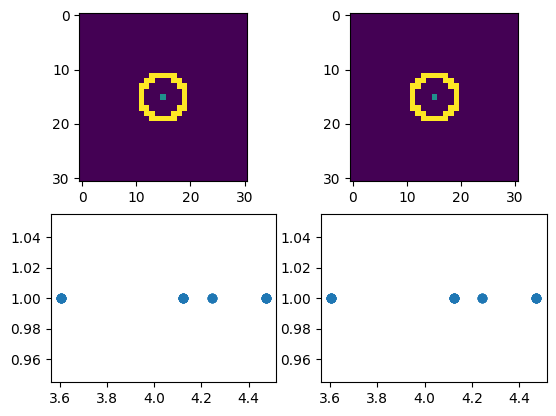

In [3]:
fig, ax = plt.subplots(nrows=2, ncols=2)

N_T = 31
cs_proj_hardcoded = np.zeros((N_T,N_T))
for c in zip(cxs, cys):
    cs_proj_hardcoded[c[1]+N_T//2, c[0]+N_T//2] = 1
cs_proj_hardcoded[N_T//2,N_T//2] = 0.5

r_hardcoded = []
cs_prof_hardcoded = []
for i in range(N_T):
    for j in range(N_T):
        if cs_proj_hardcoded[j, i] > 0 and i != N_T//2 and j != N_T//2:
            r = ((i-N_T//2)**2 + (j-N_T//2)**2)**0.5
            r_hardcoded.append(r)
            cs_prof_hardcoded.append(cs_proj_hardcoded[j, i])

cs_proj_dynamic = np.zeros((N_T,N_T))
for mu in range(NL):
    cx = int(np.round(R * np.cos(2 * np.pi * mu/NL)))
    cy = int(np.round(R * np.sin(2 * np.pi * mu/NL)))
    cs_proj_dynamic[cy+N_T//2, cx+N_T//2] = 1
cs_proj_dynamic[N_T//2,N_T//2] = 0.5

r_dynamic = []
cs_prof_dynamic = []
for i in range(N_T):
    for j in range(N_T):
        if cs_proj_dynamic[j, i] > 0 and i != N_T//2 and j != N_T//2:
            r = ((i-N_T//2)**2 + (j-N_T//2)**2)**0.5
            r_dynamic.append(r)
            cs_prof_dynamic.append(cs_proj_dynamic[j, i])

ax[0][0].imshow(cs_proj_hardcoded)
ax[0][1].imshow(cs_proj_dynamic)
ax[1][0].scatter(x=r_hardcoded, y=cs_prof_hardcoded)
ax[1][1].scatter(x=r_dynamic, y=cs_prof_dynamic)

In [4]:
def stream_roll(xi):
    xf = np.array(xi, copy=True)

    for dir_i, i_dir in enumerate(idxs_dir):
        cy = cys[i_dir]
        cx = cxs[i_dir]
        
        xf[:, :, i_dir] = np.roll(xf[:, :, i_dir], cx, axis=1)
        xf[:, :, i_dir] = np.roll(xf[:, :, i_dir], cy, axis=0)
    
    return xf

def stream_custom(xi):
    # xf = np.array(xi, copy=True)
    xf = np.zeros_like(xi)

    for dir_i, i_dir in enumerate(idxs_dir):
        nl = i_dir
        cy = cys[i_dir]
        cx = cxs[i_dir]

        for j in range(NY):
            for i in range(NX):
                l_src = xi[j, i, nl]

                l_stream = l_src
                if False:
                    v = (cx**2 + cy**2)**0.5
                    l_stream = l_src * v
                    xf[j, i, nl] += l_src - l_stream

                    if l_stream != 0 or l_src != 0:
                        print(l_src, l_stream, xf[j, i, nl], v)

                # print(f"xf[{(j + cy) % NY}, {(i + cx) % NX}, {nl}] += {l_src}")
                xf[(j + cy) % NY, (i + cx) % NX, nl] += l_src

    return xf

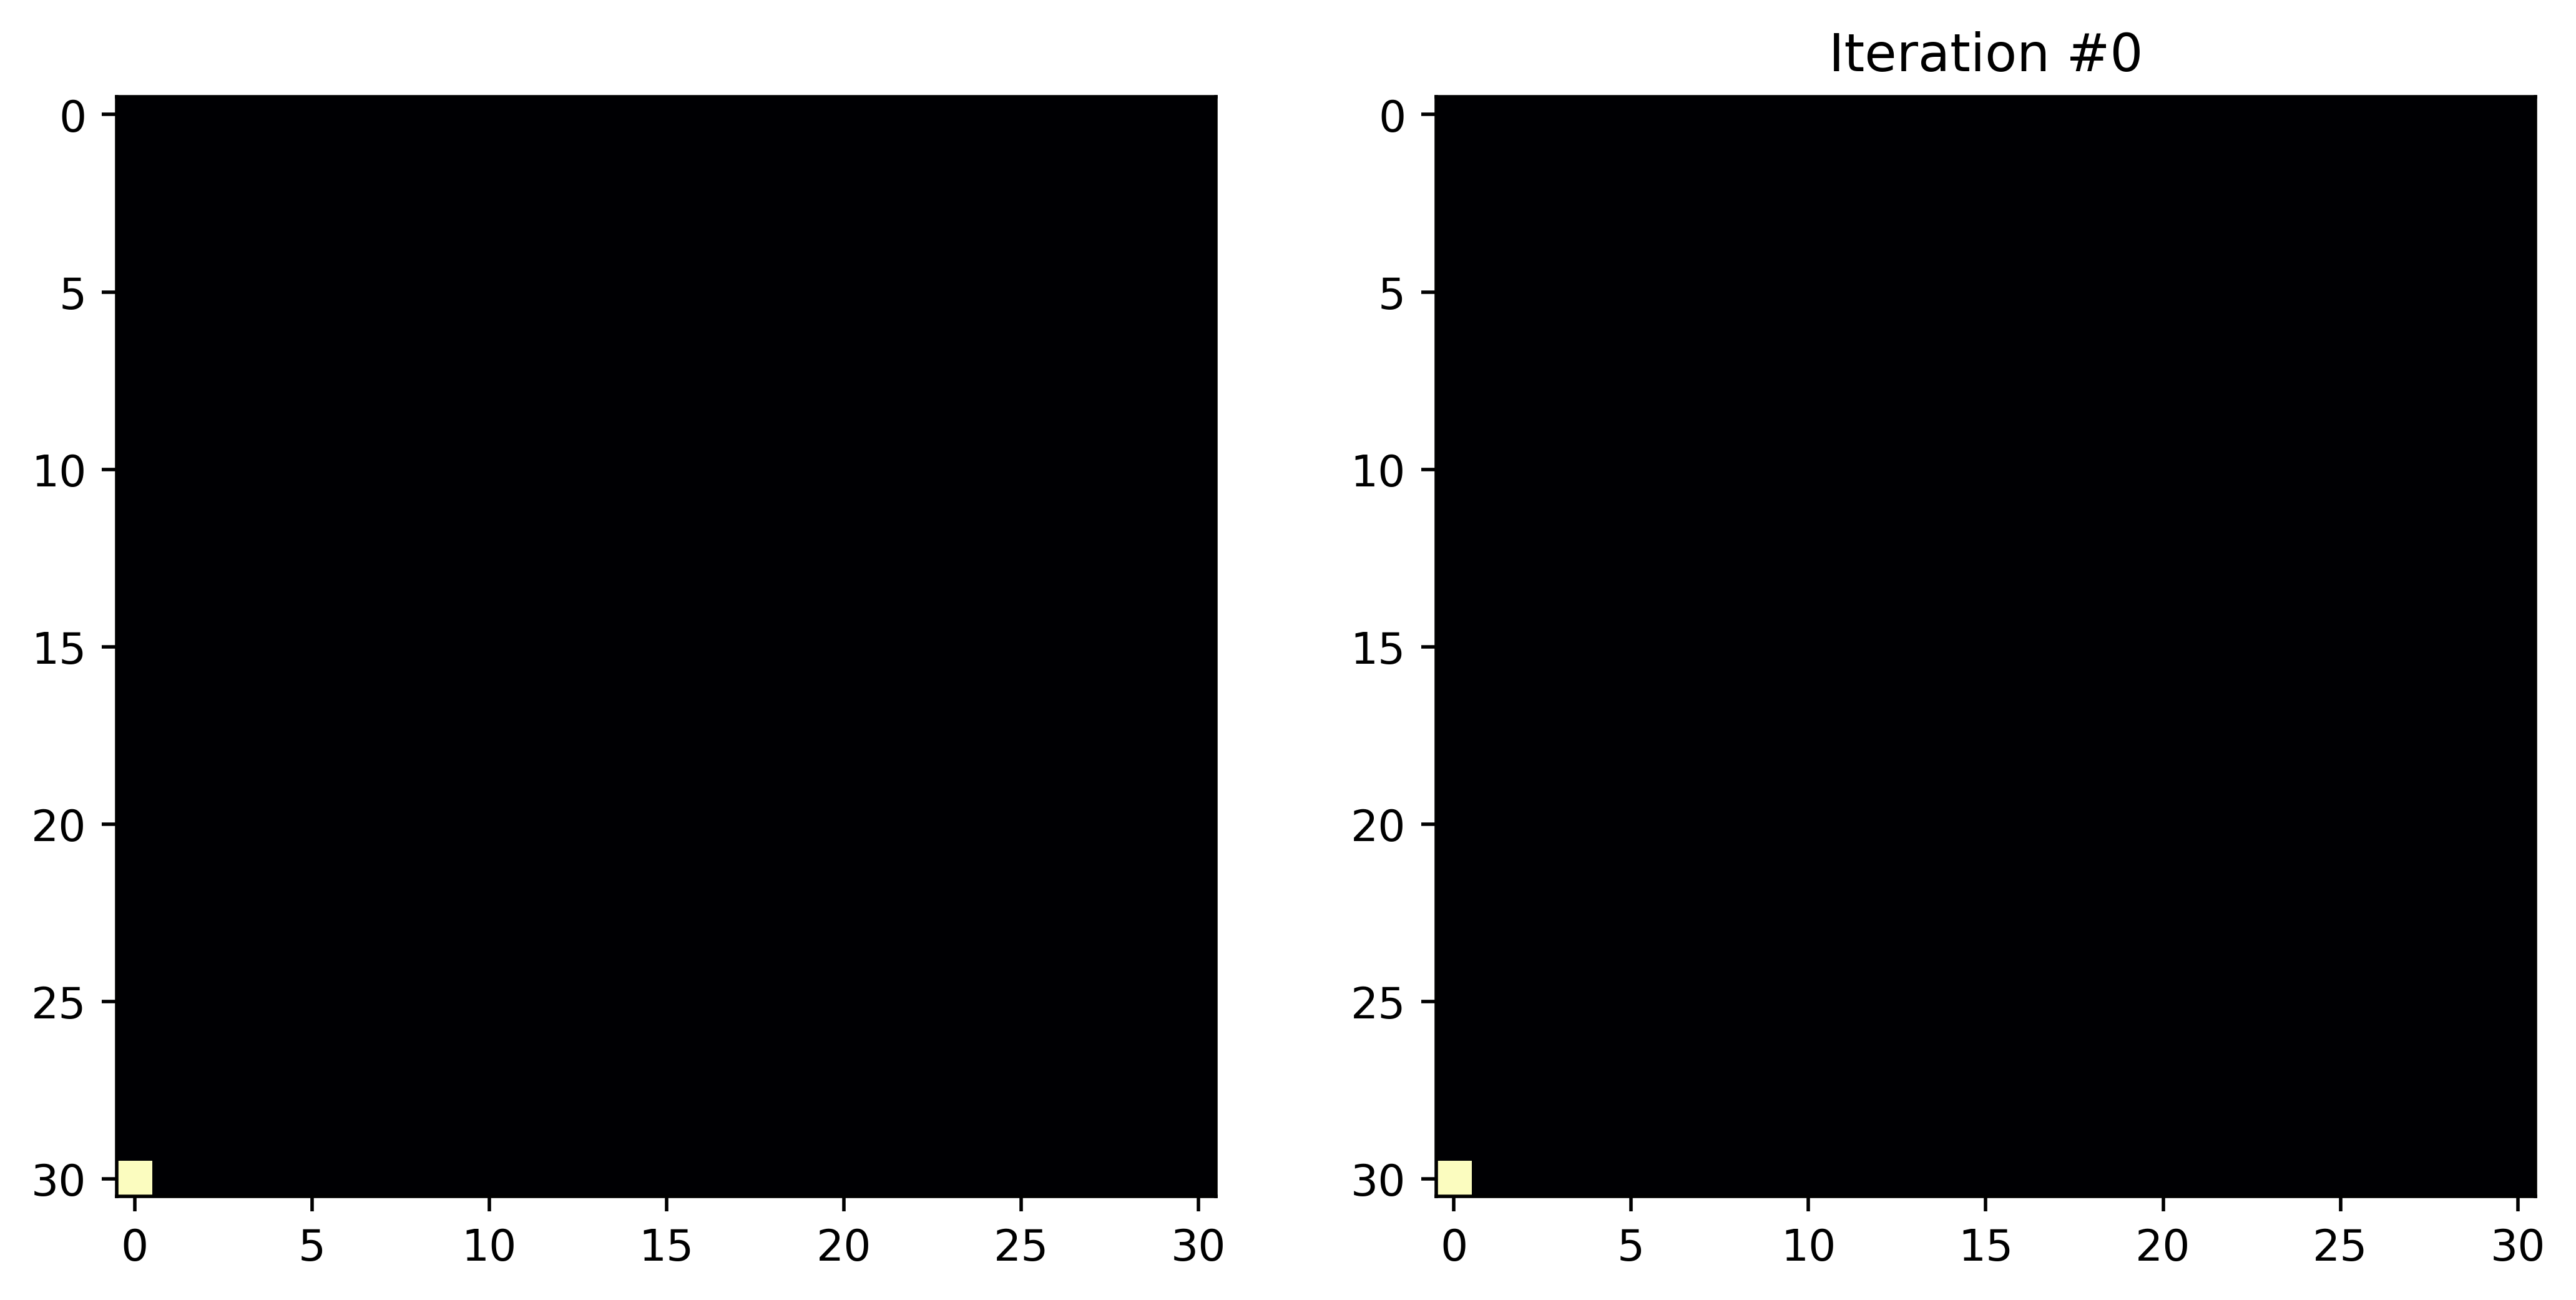

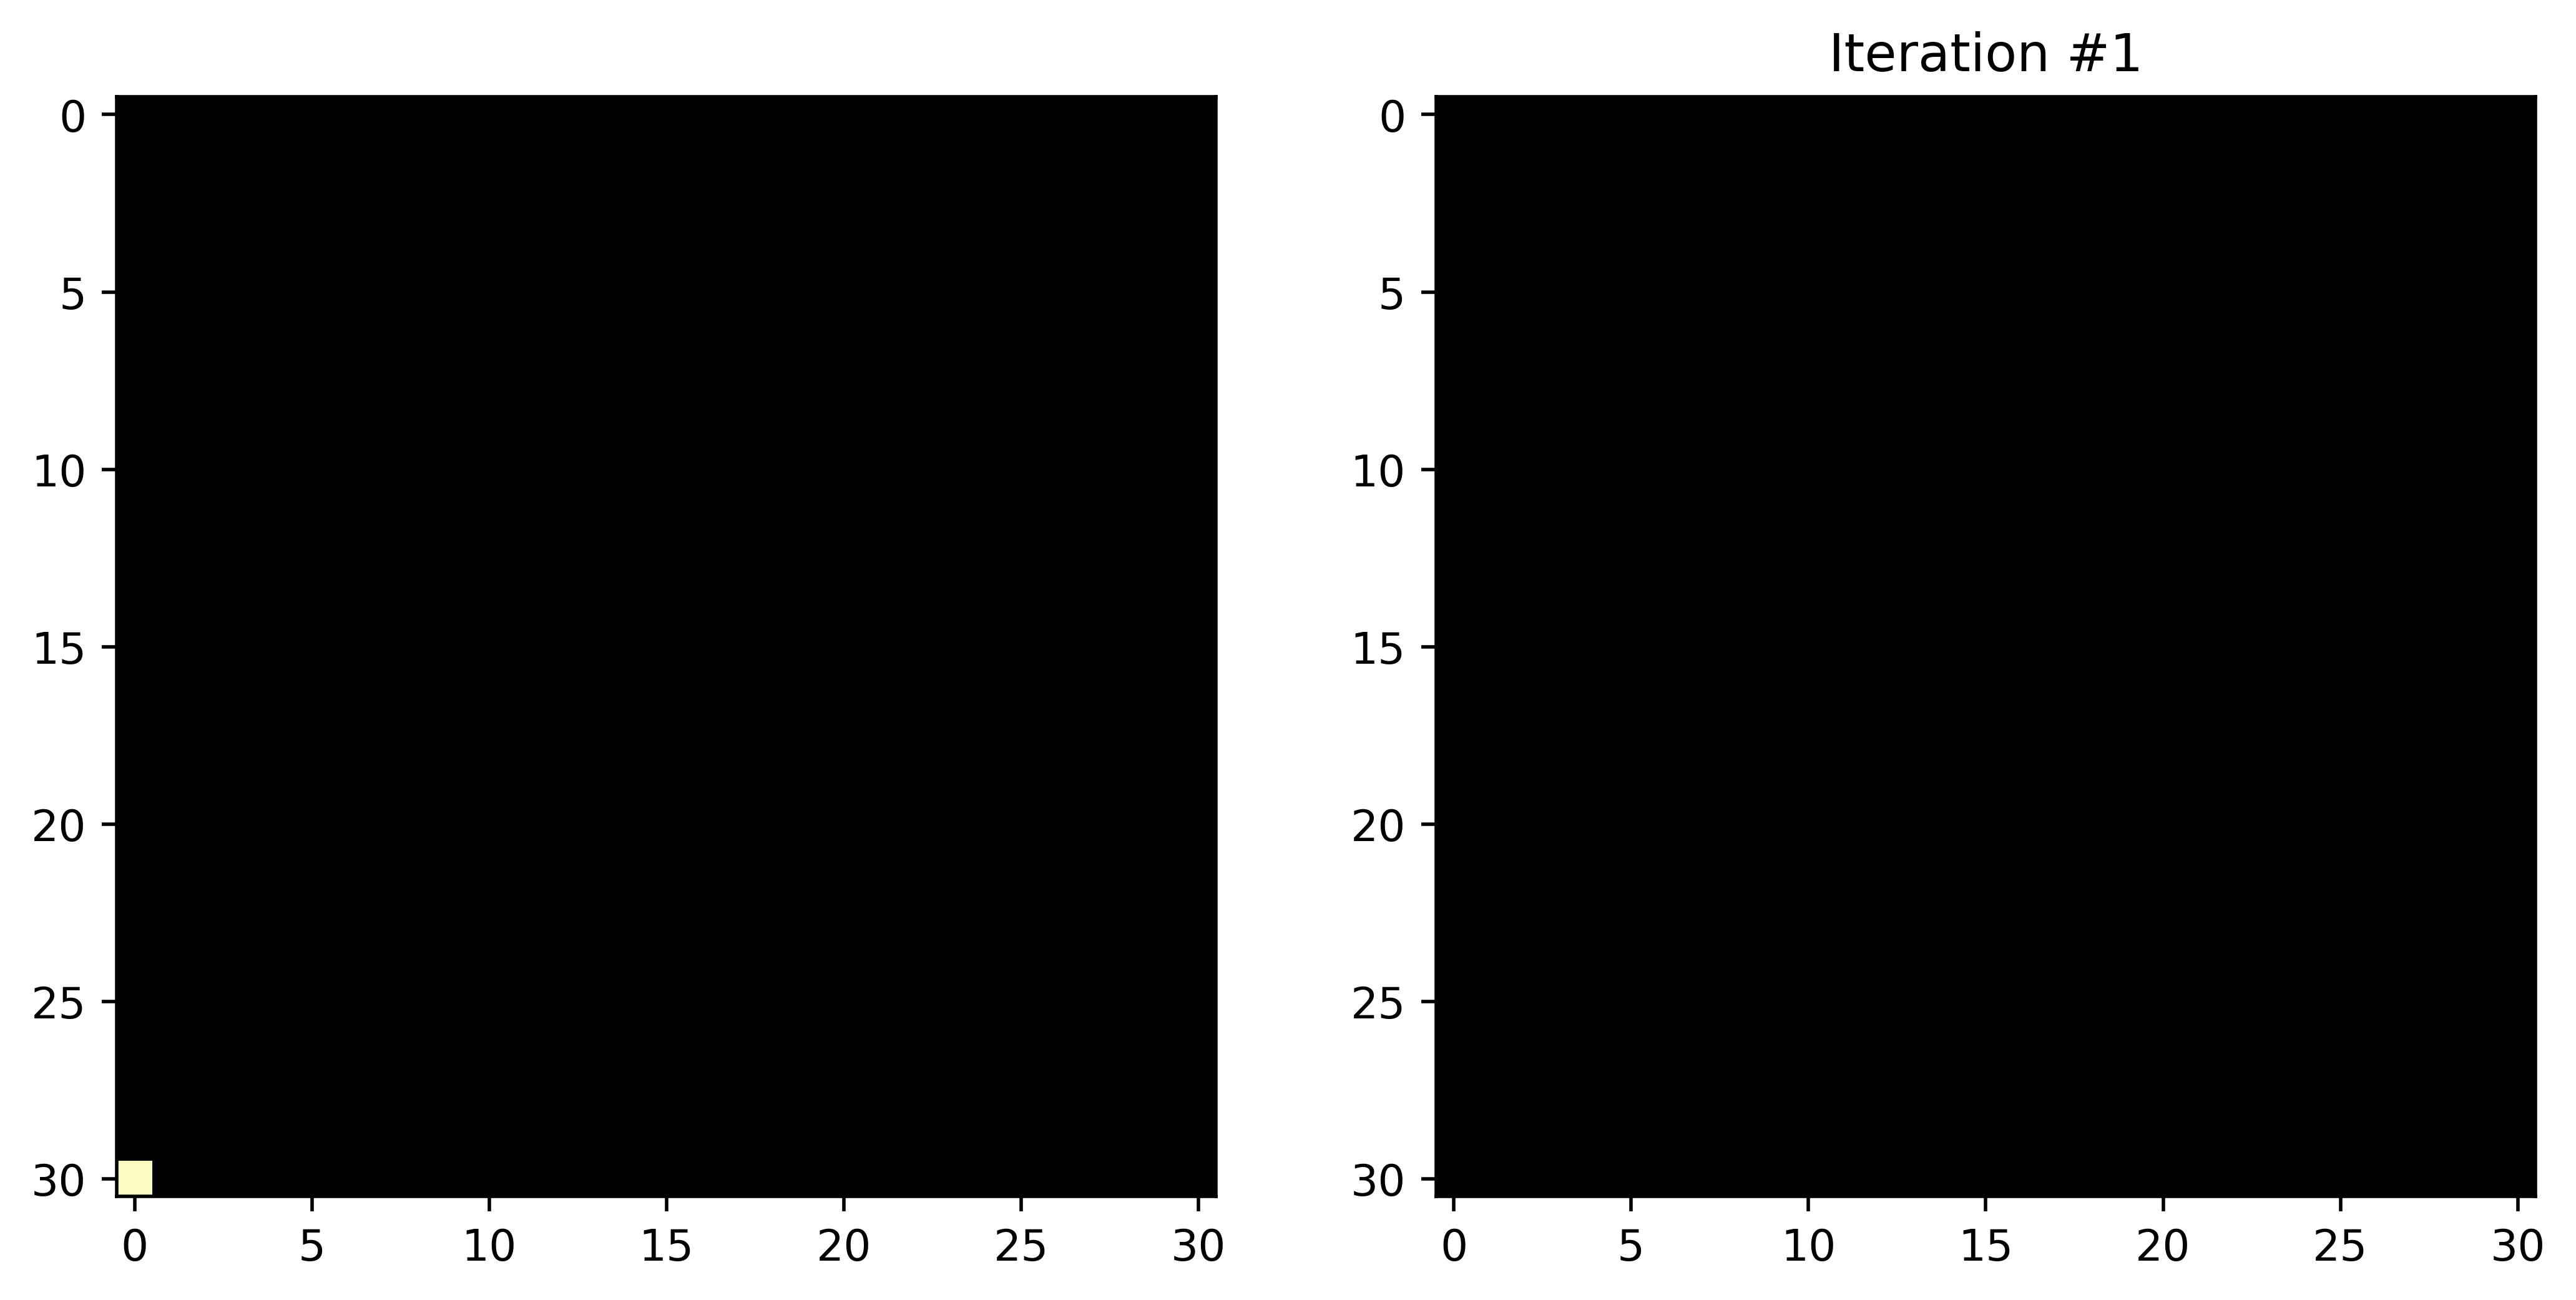

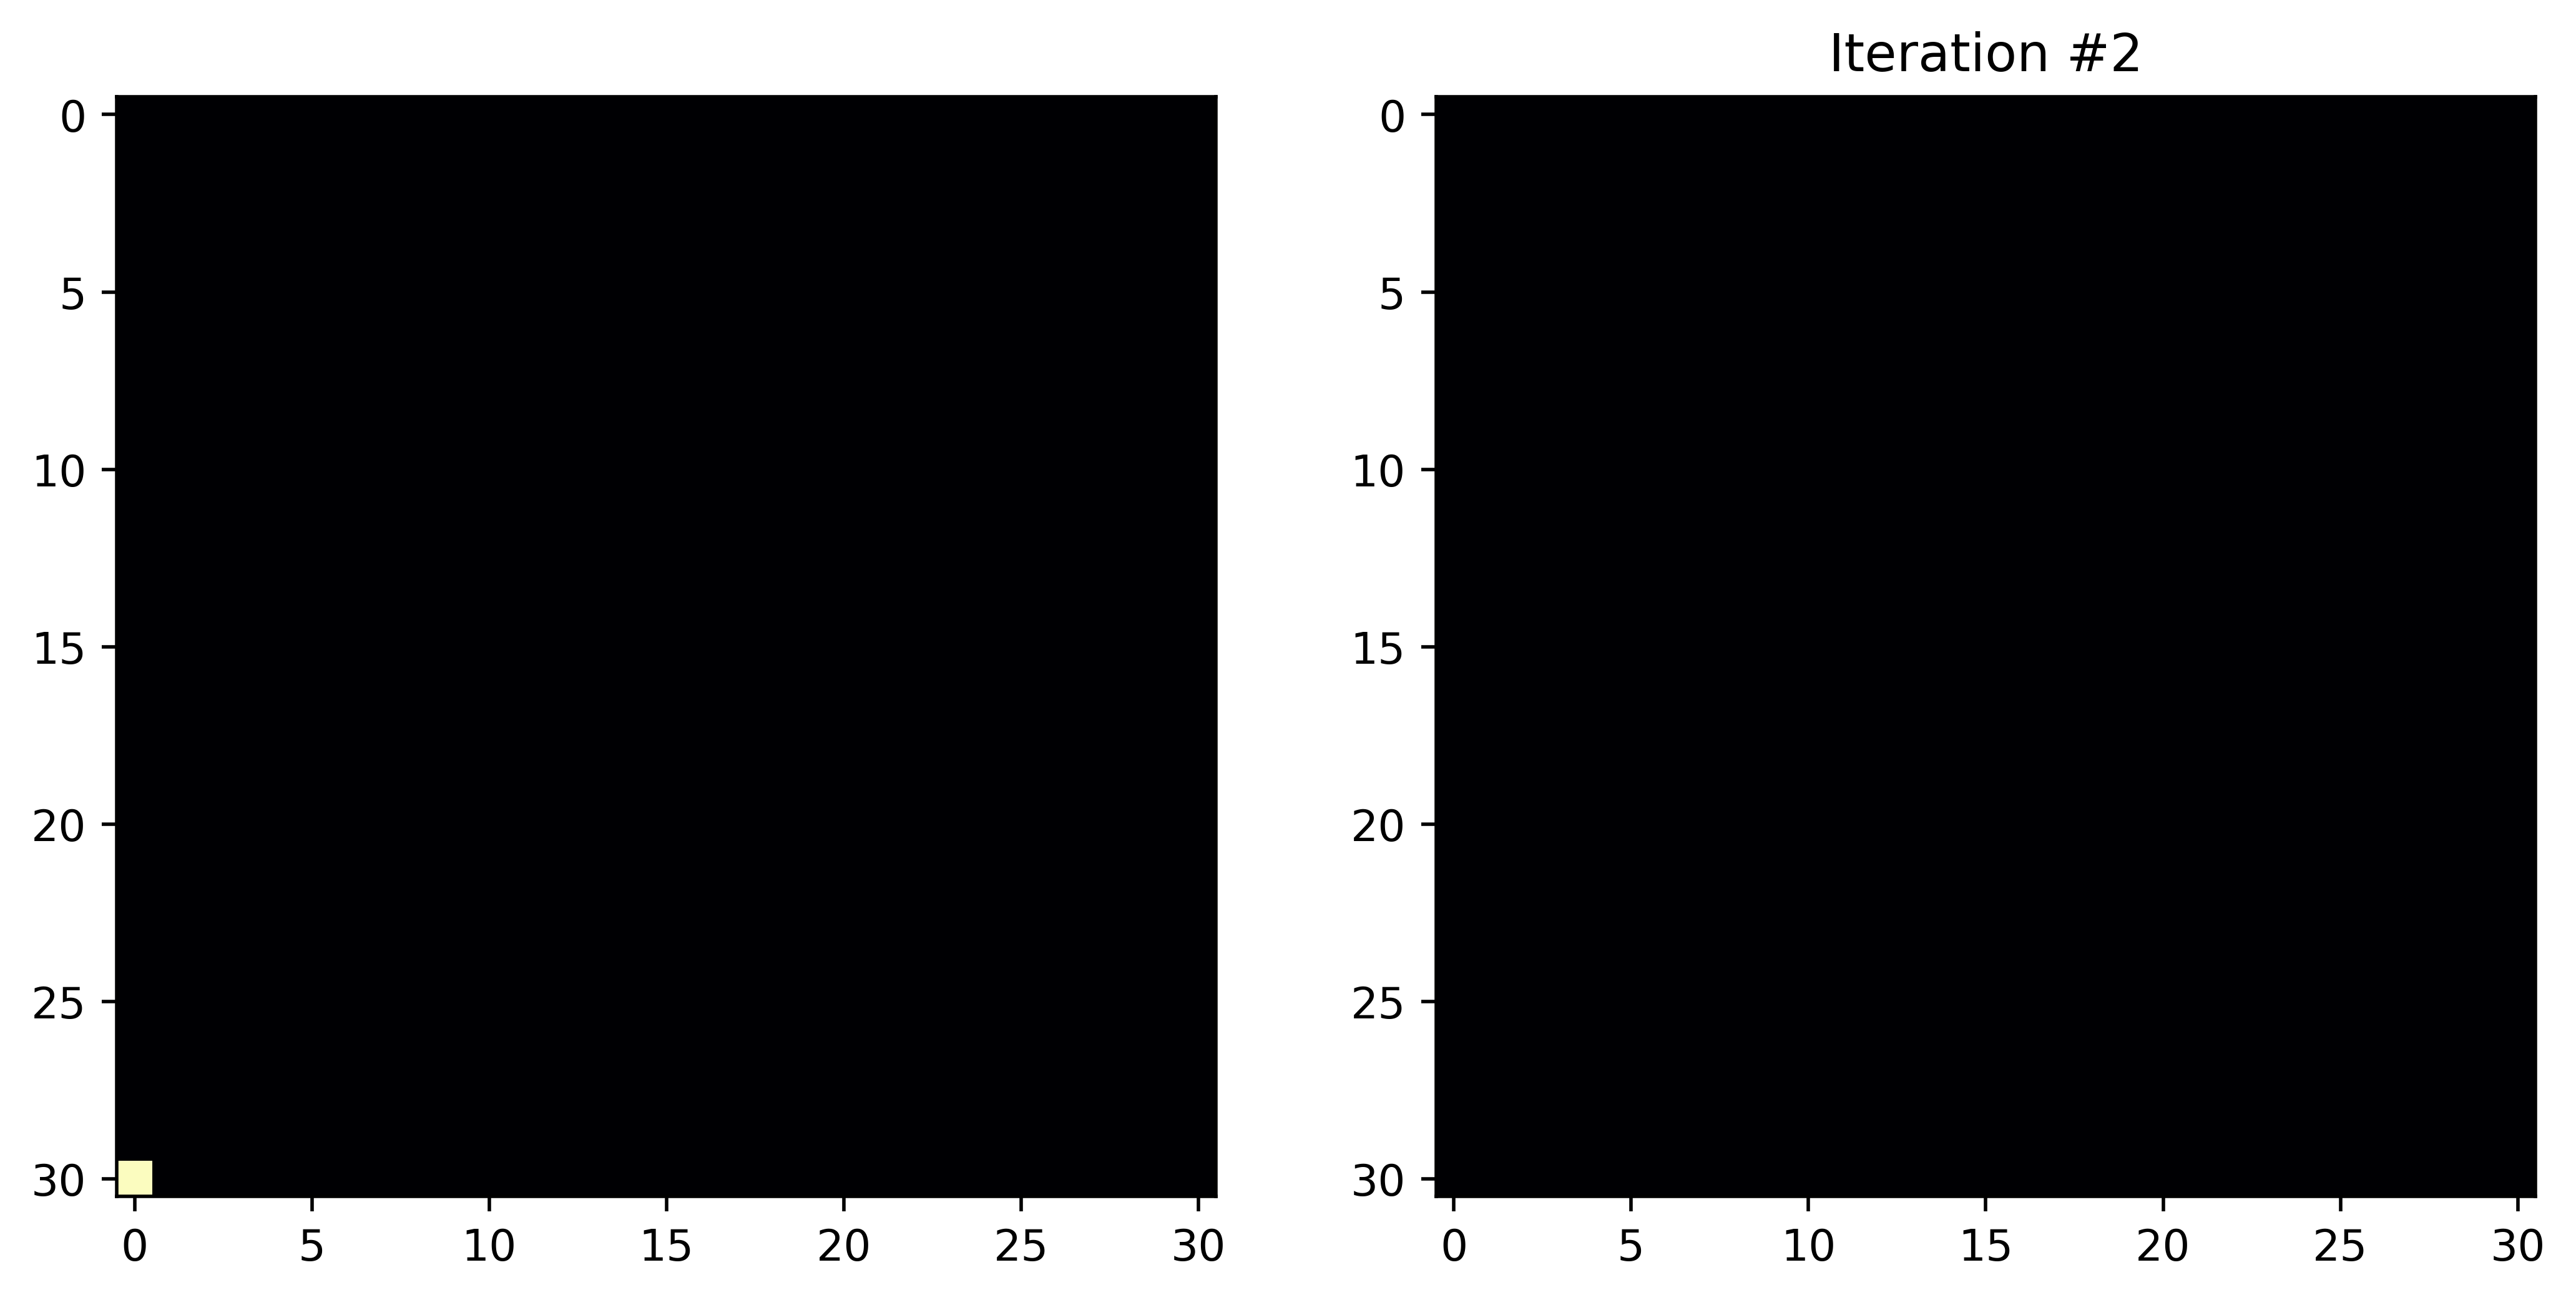

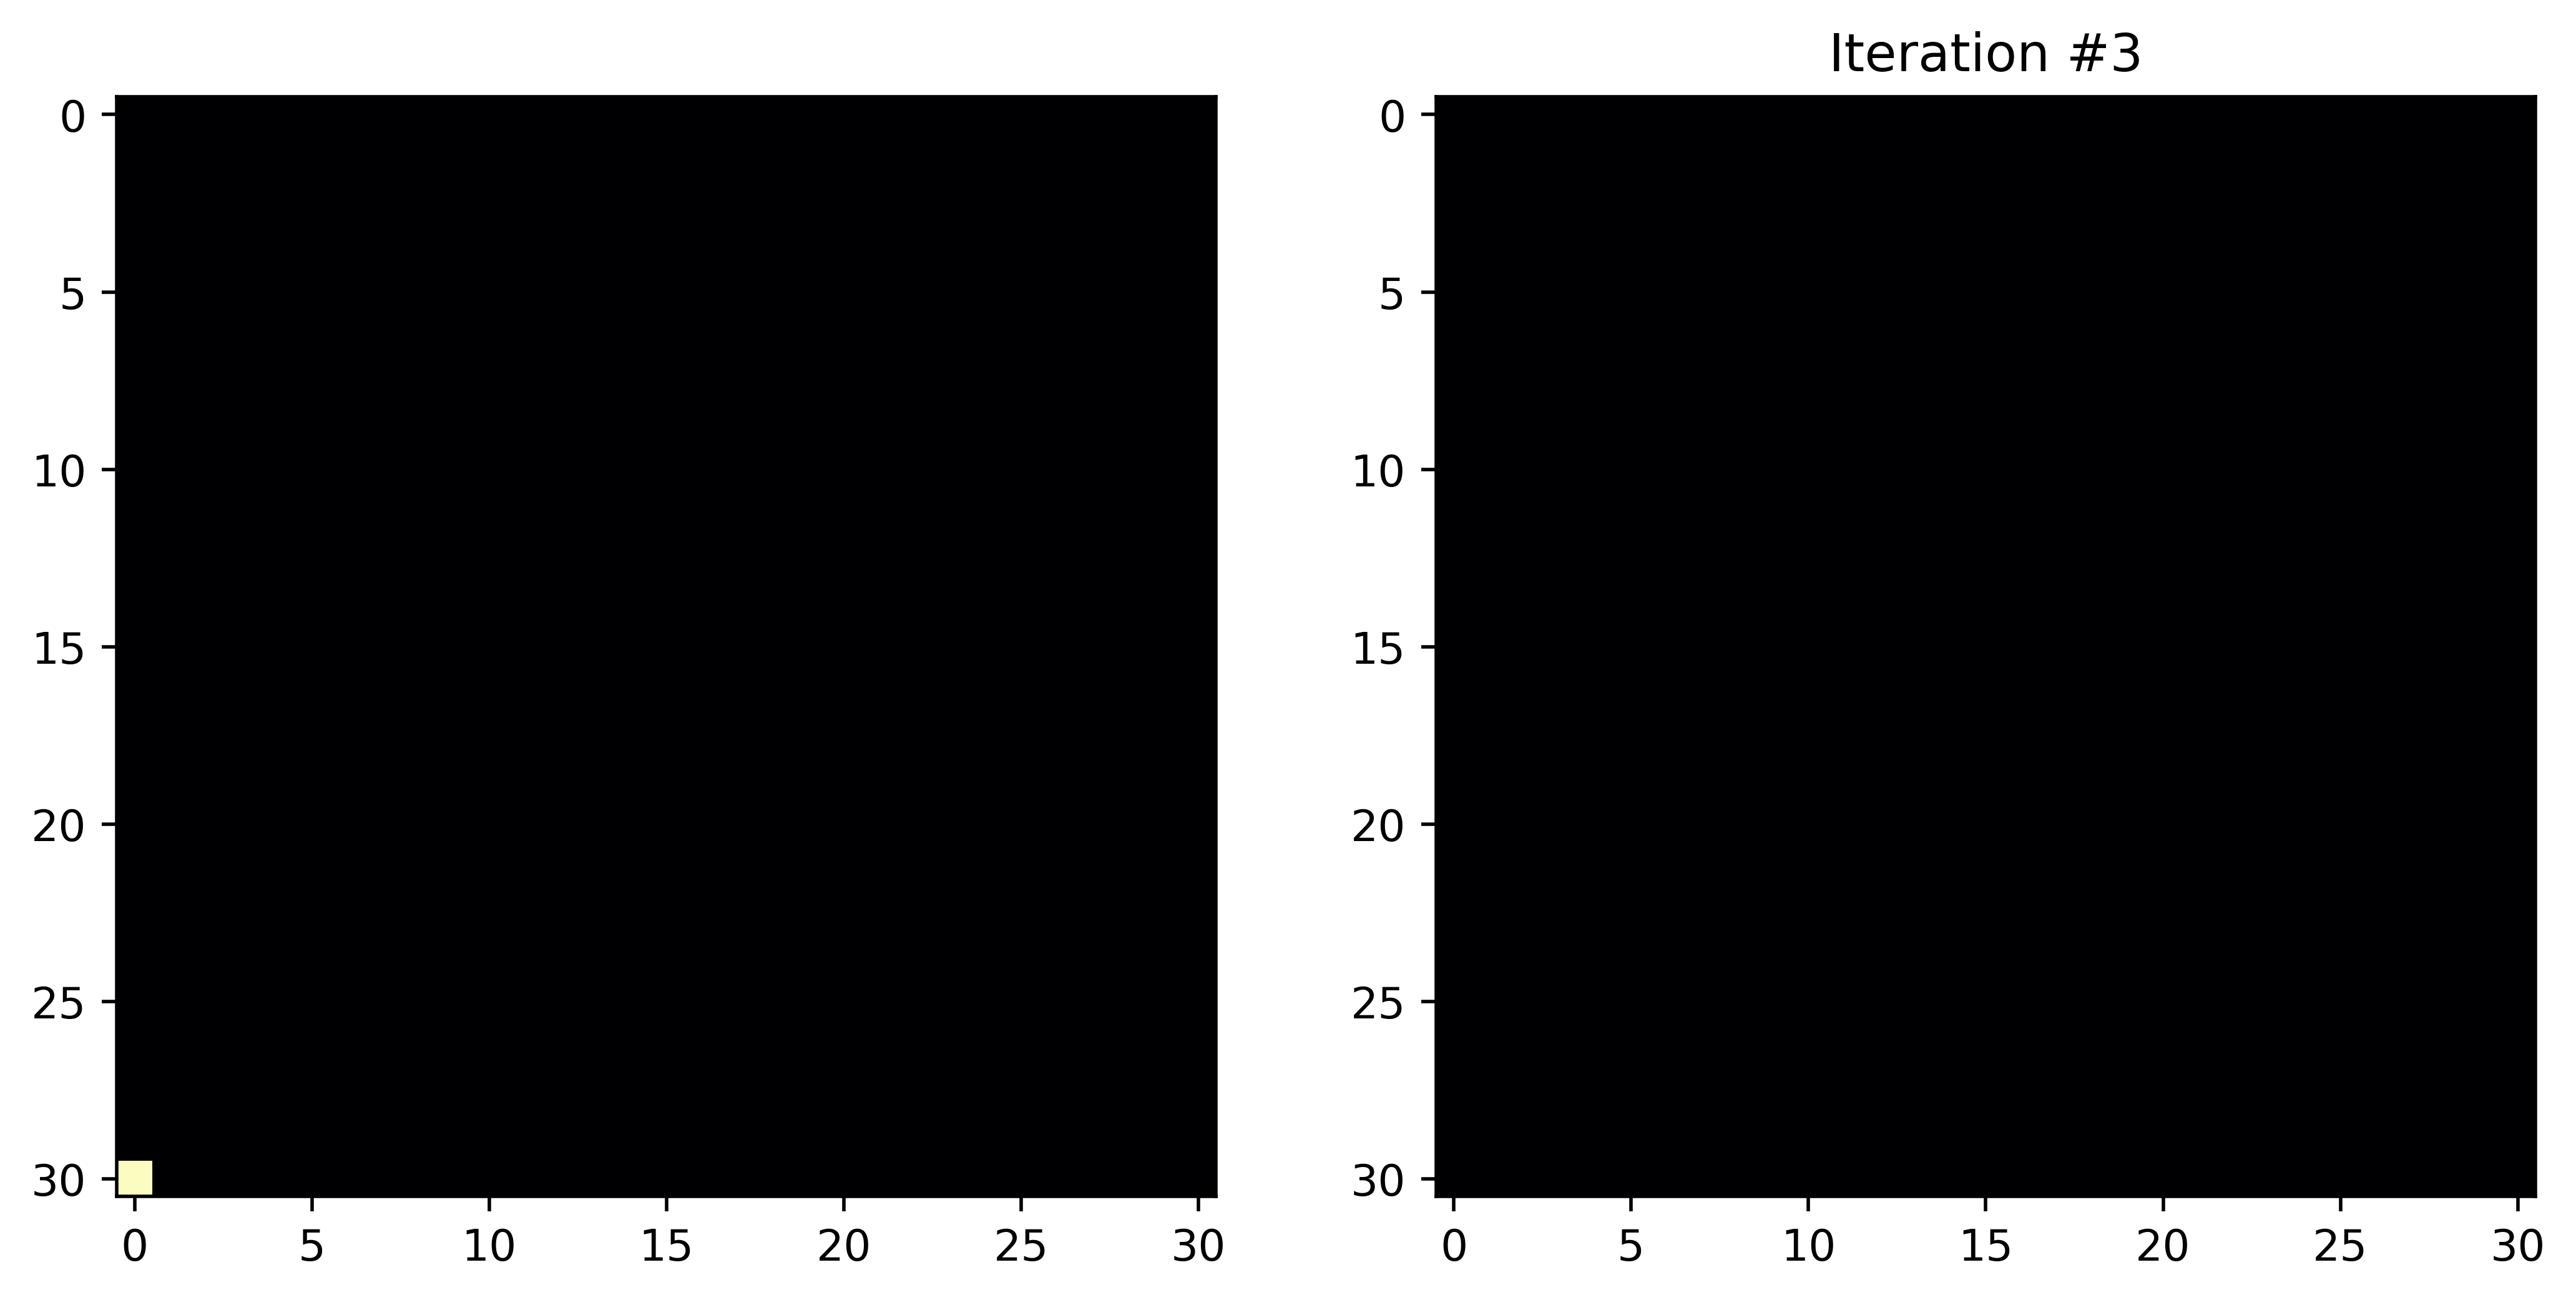

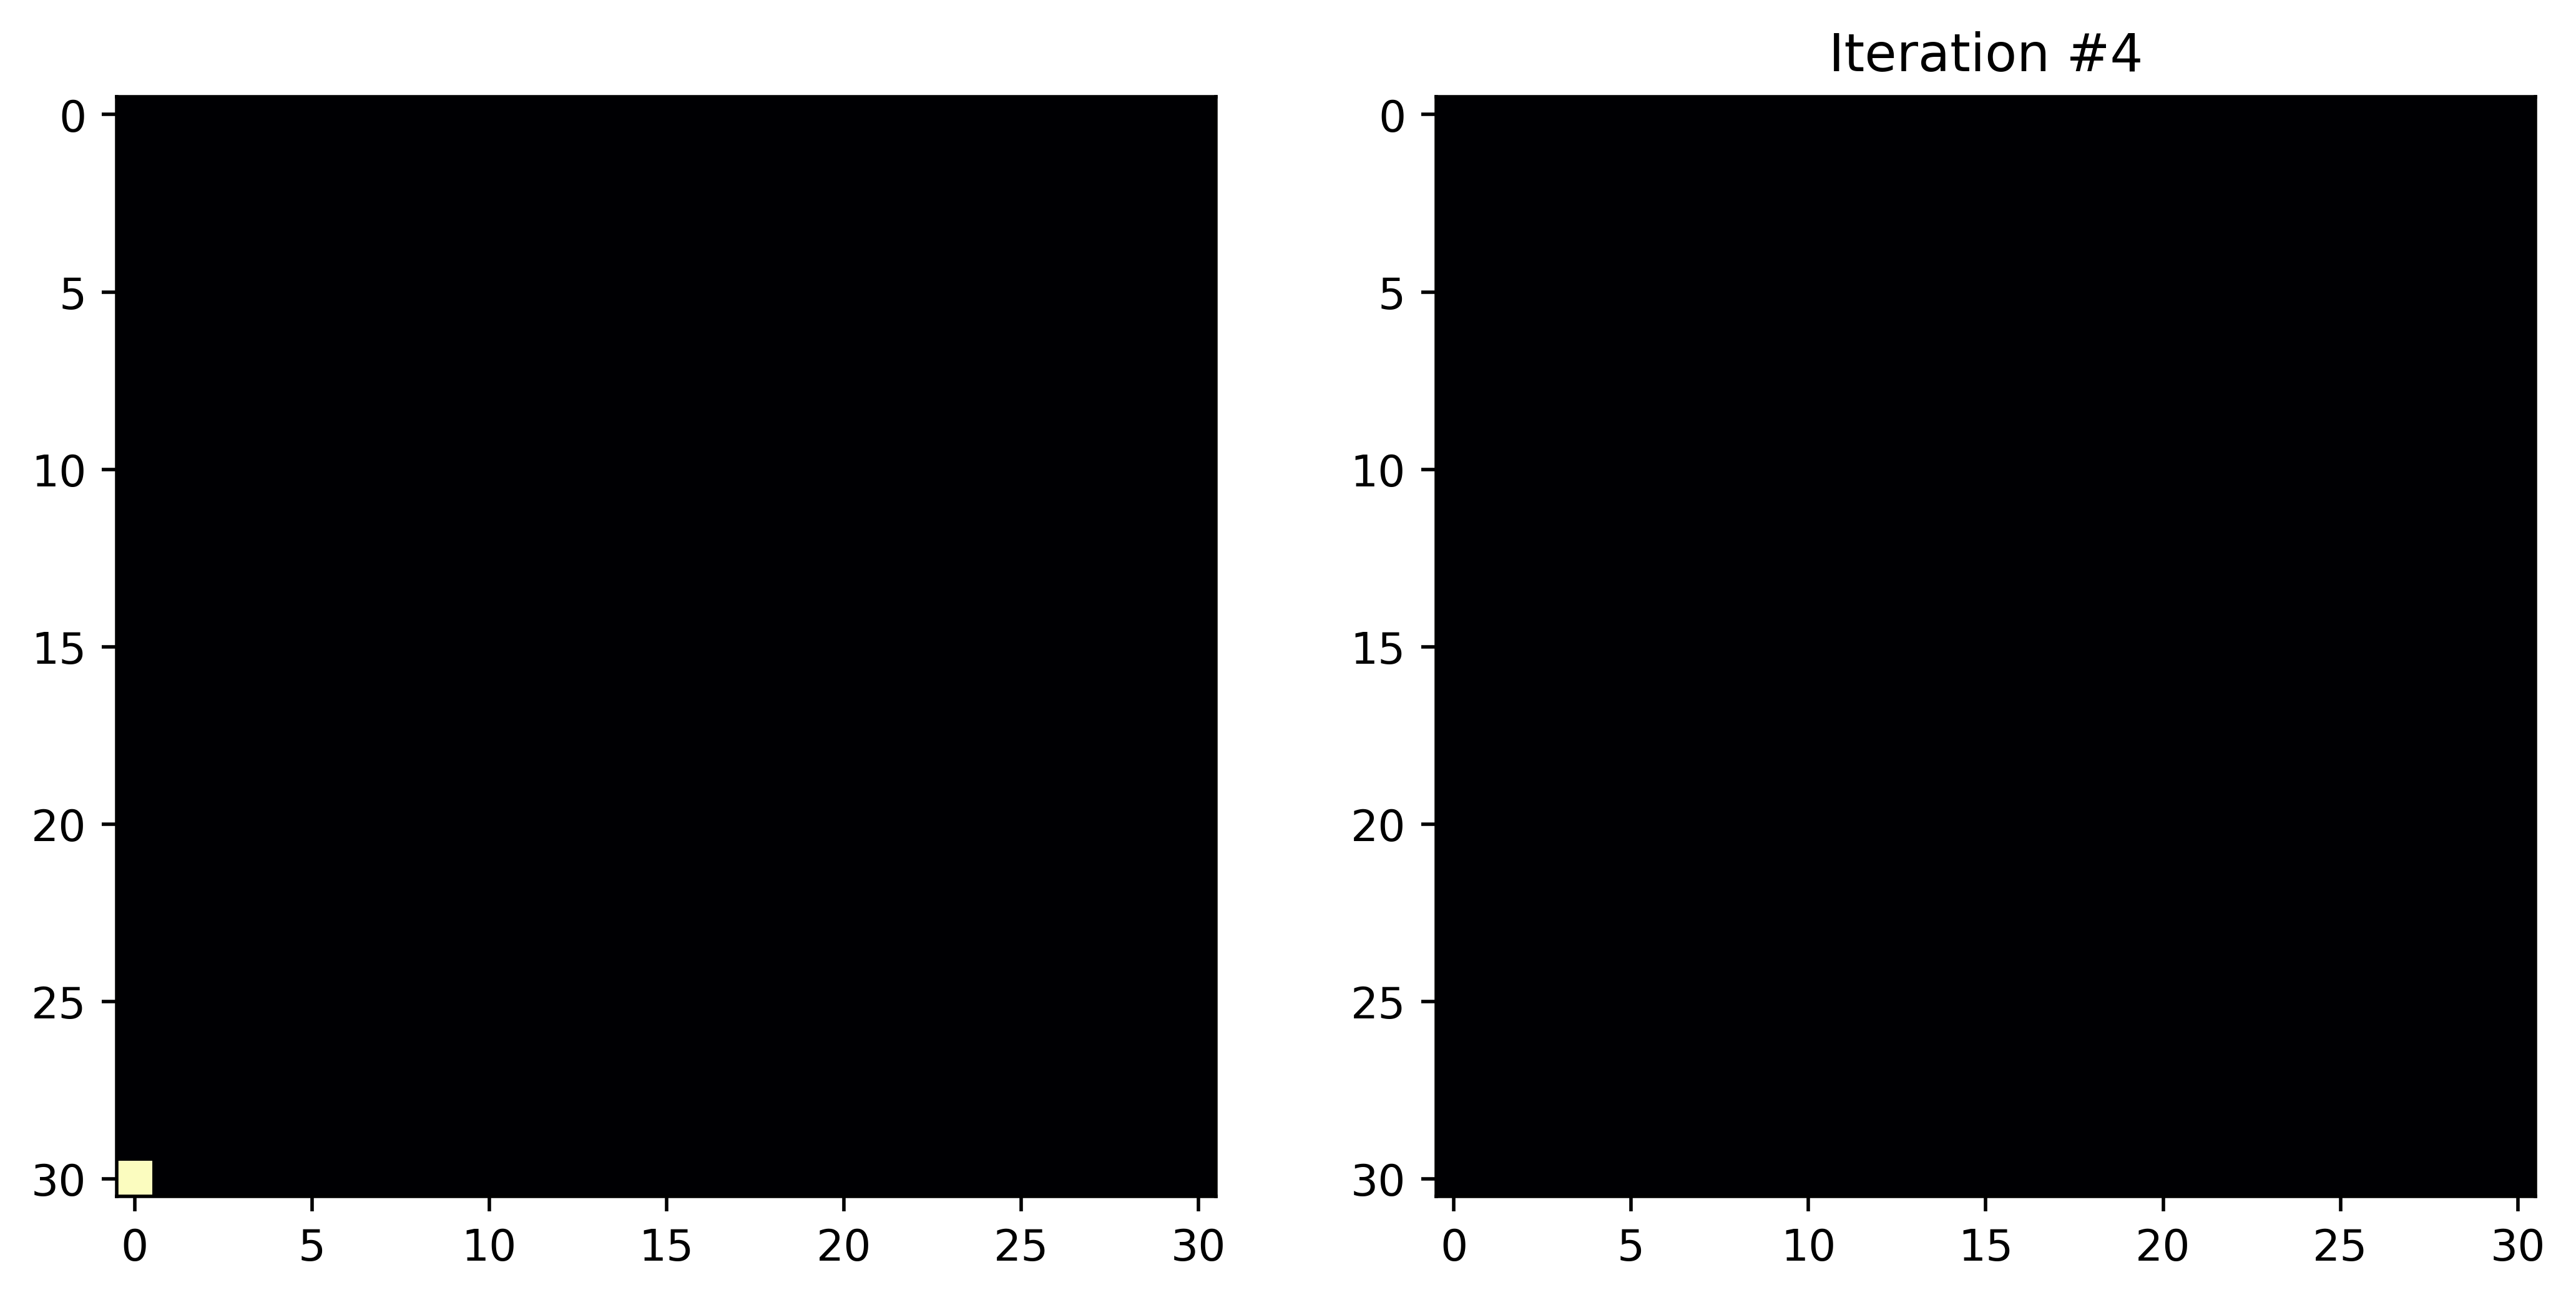

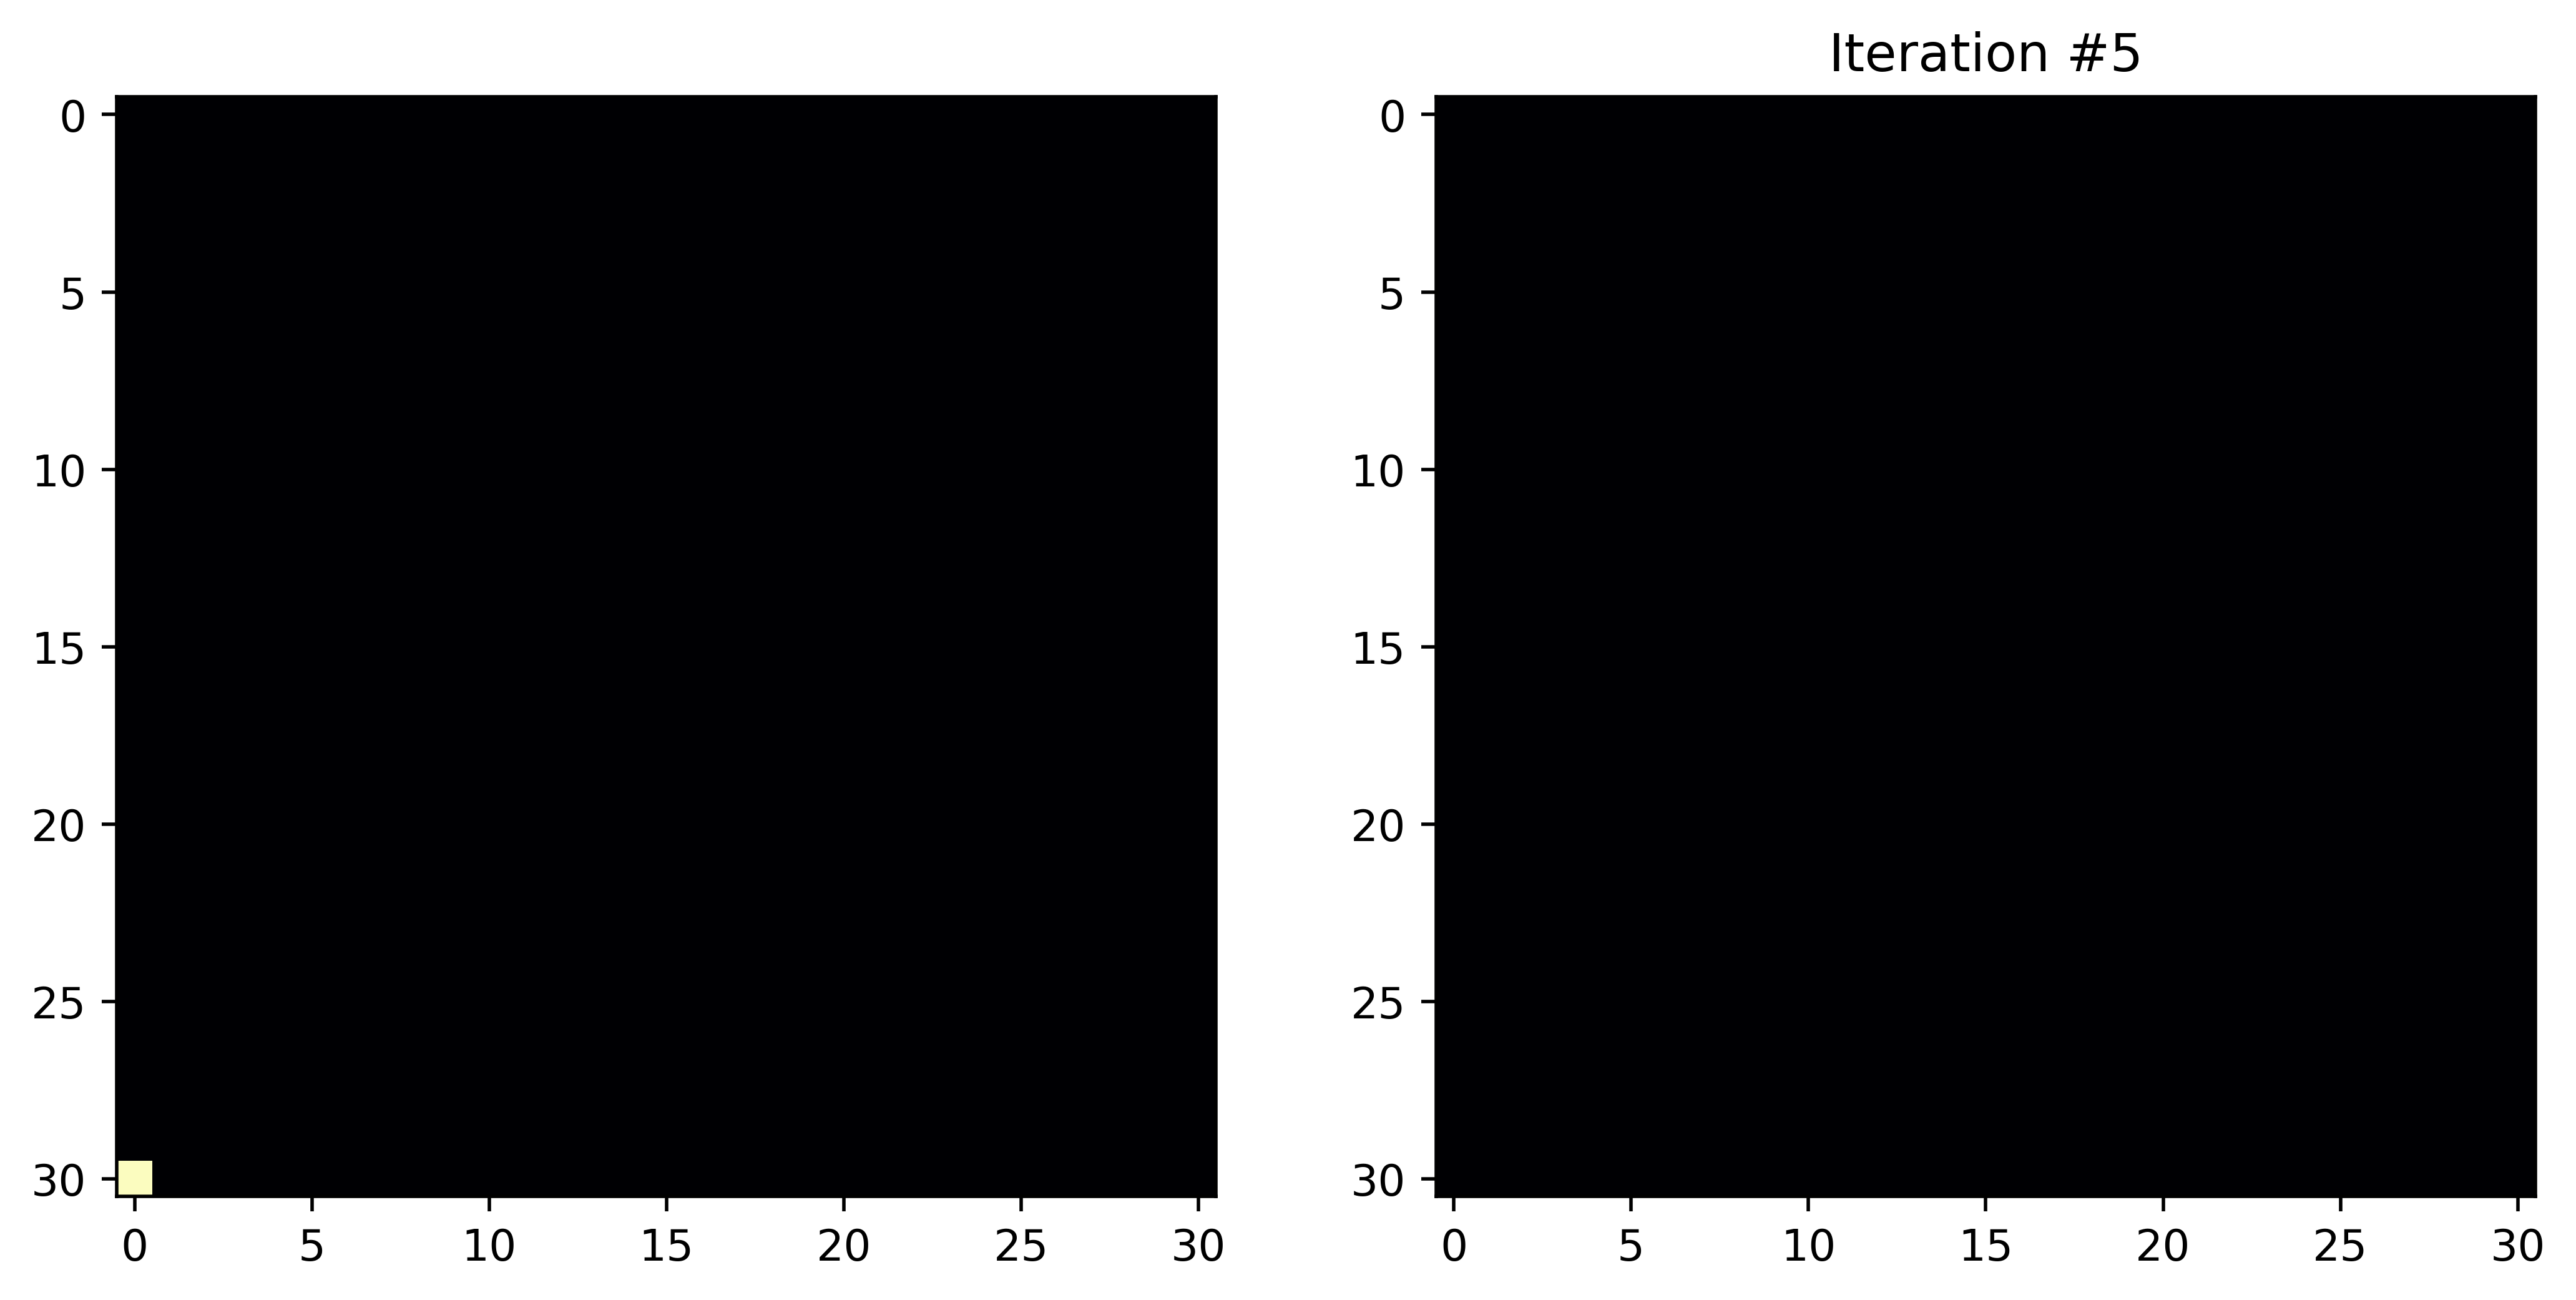

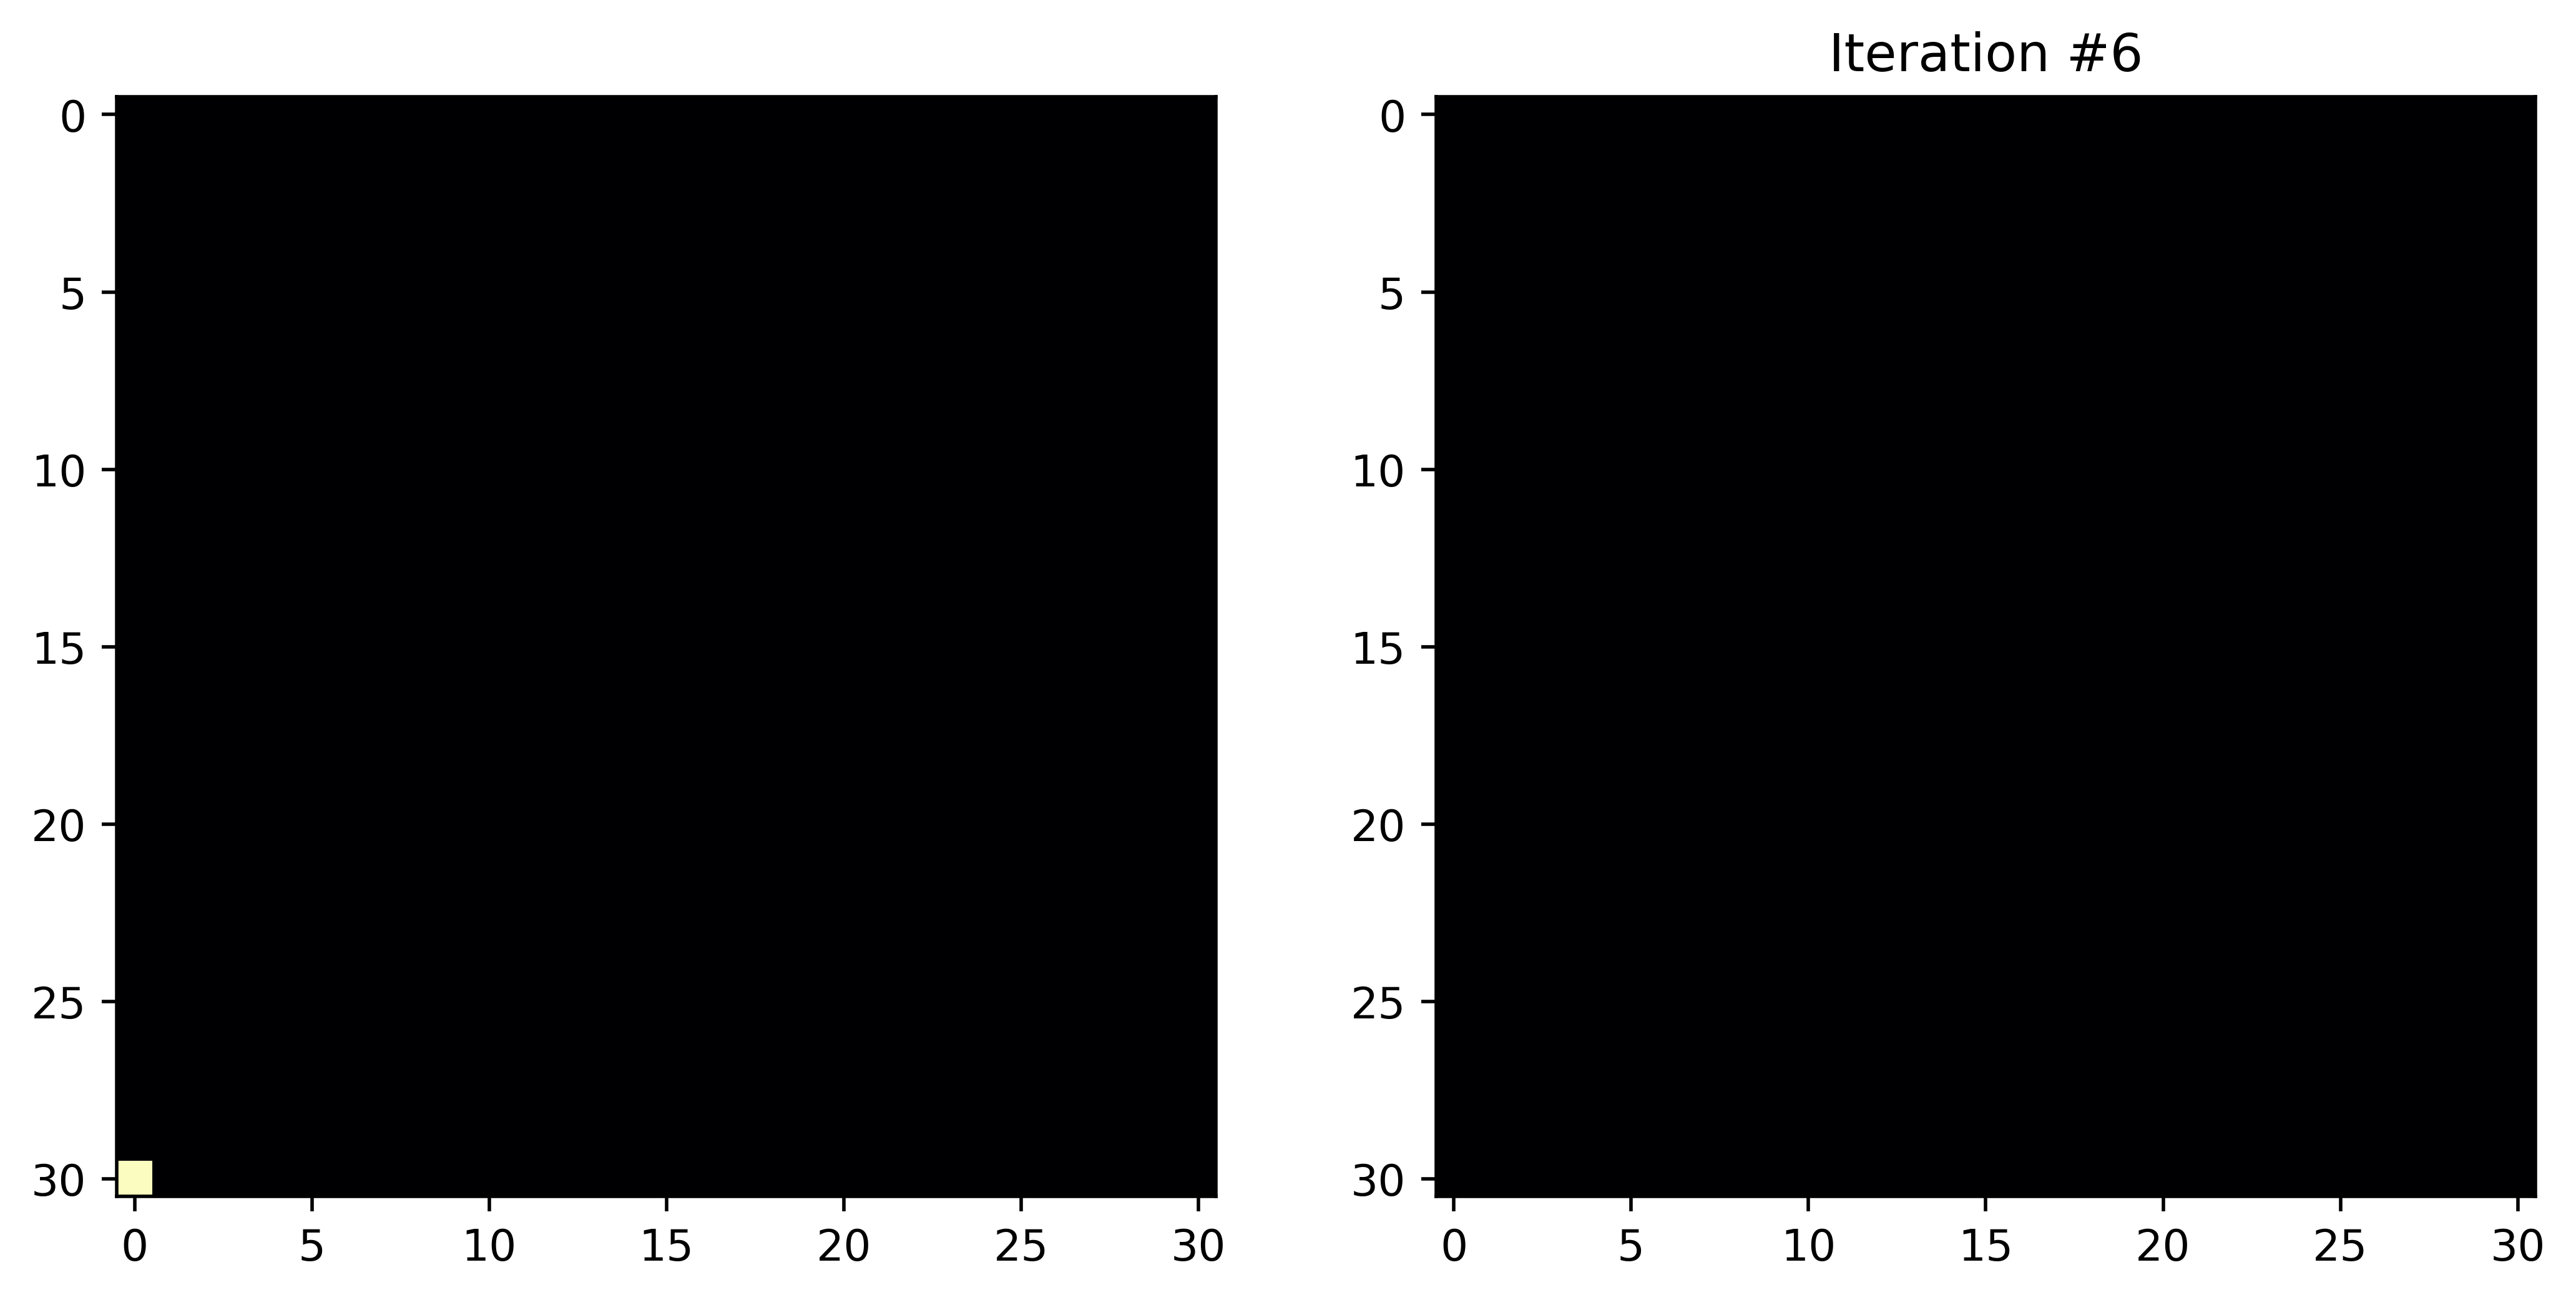

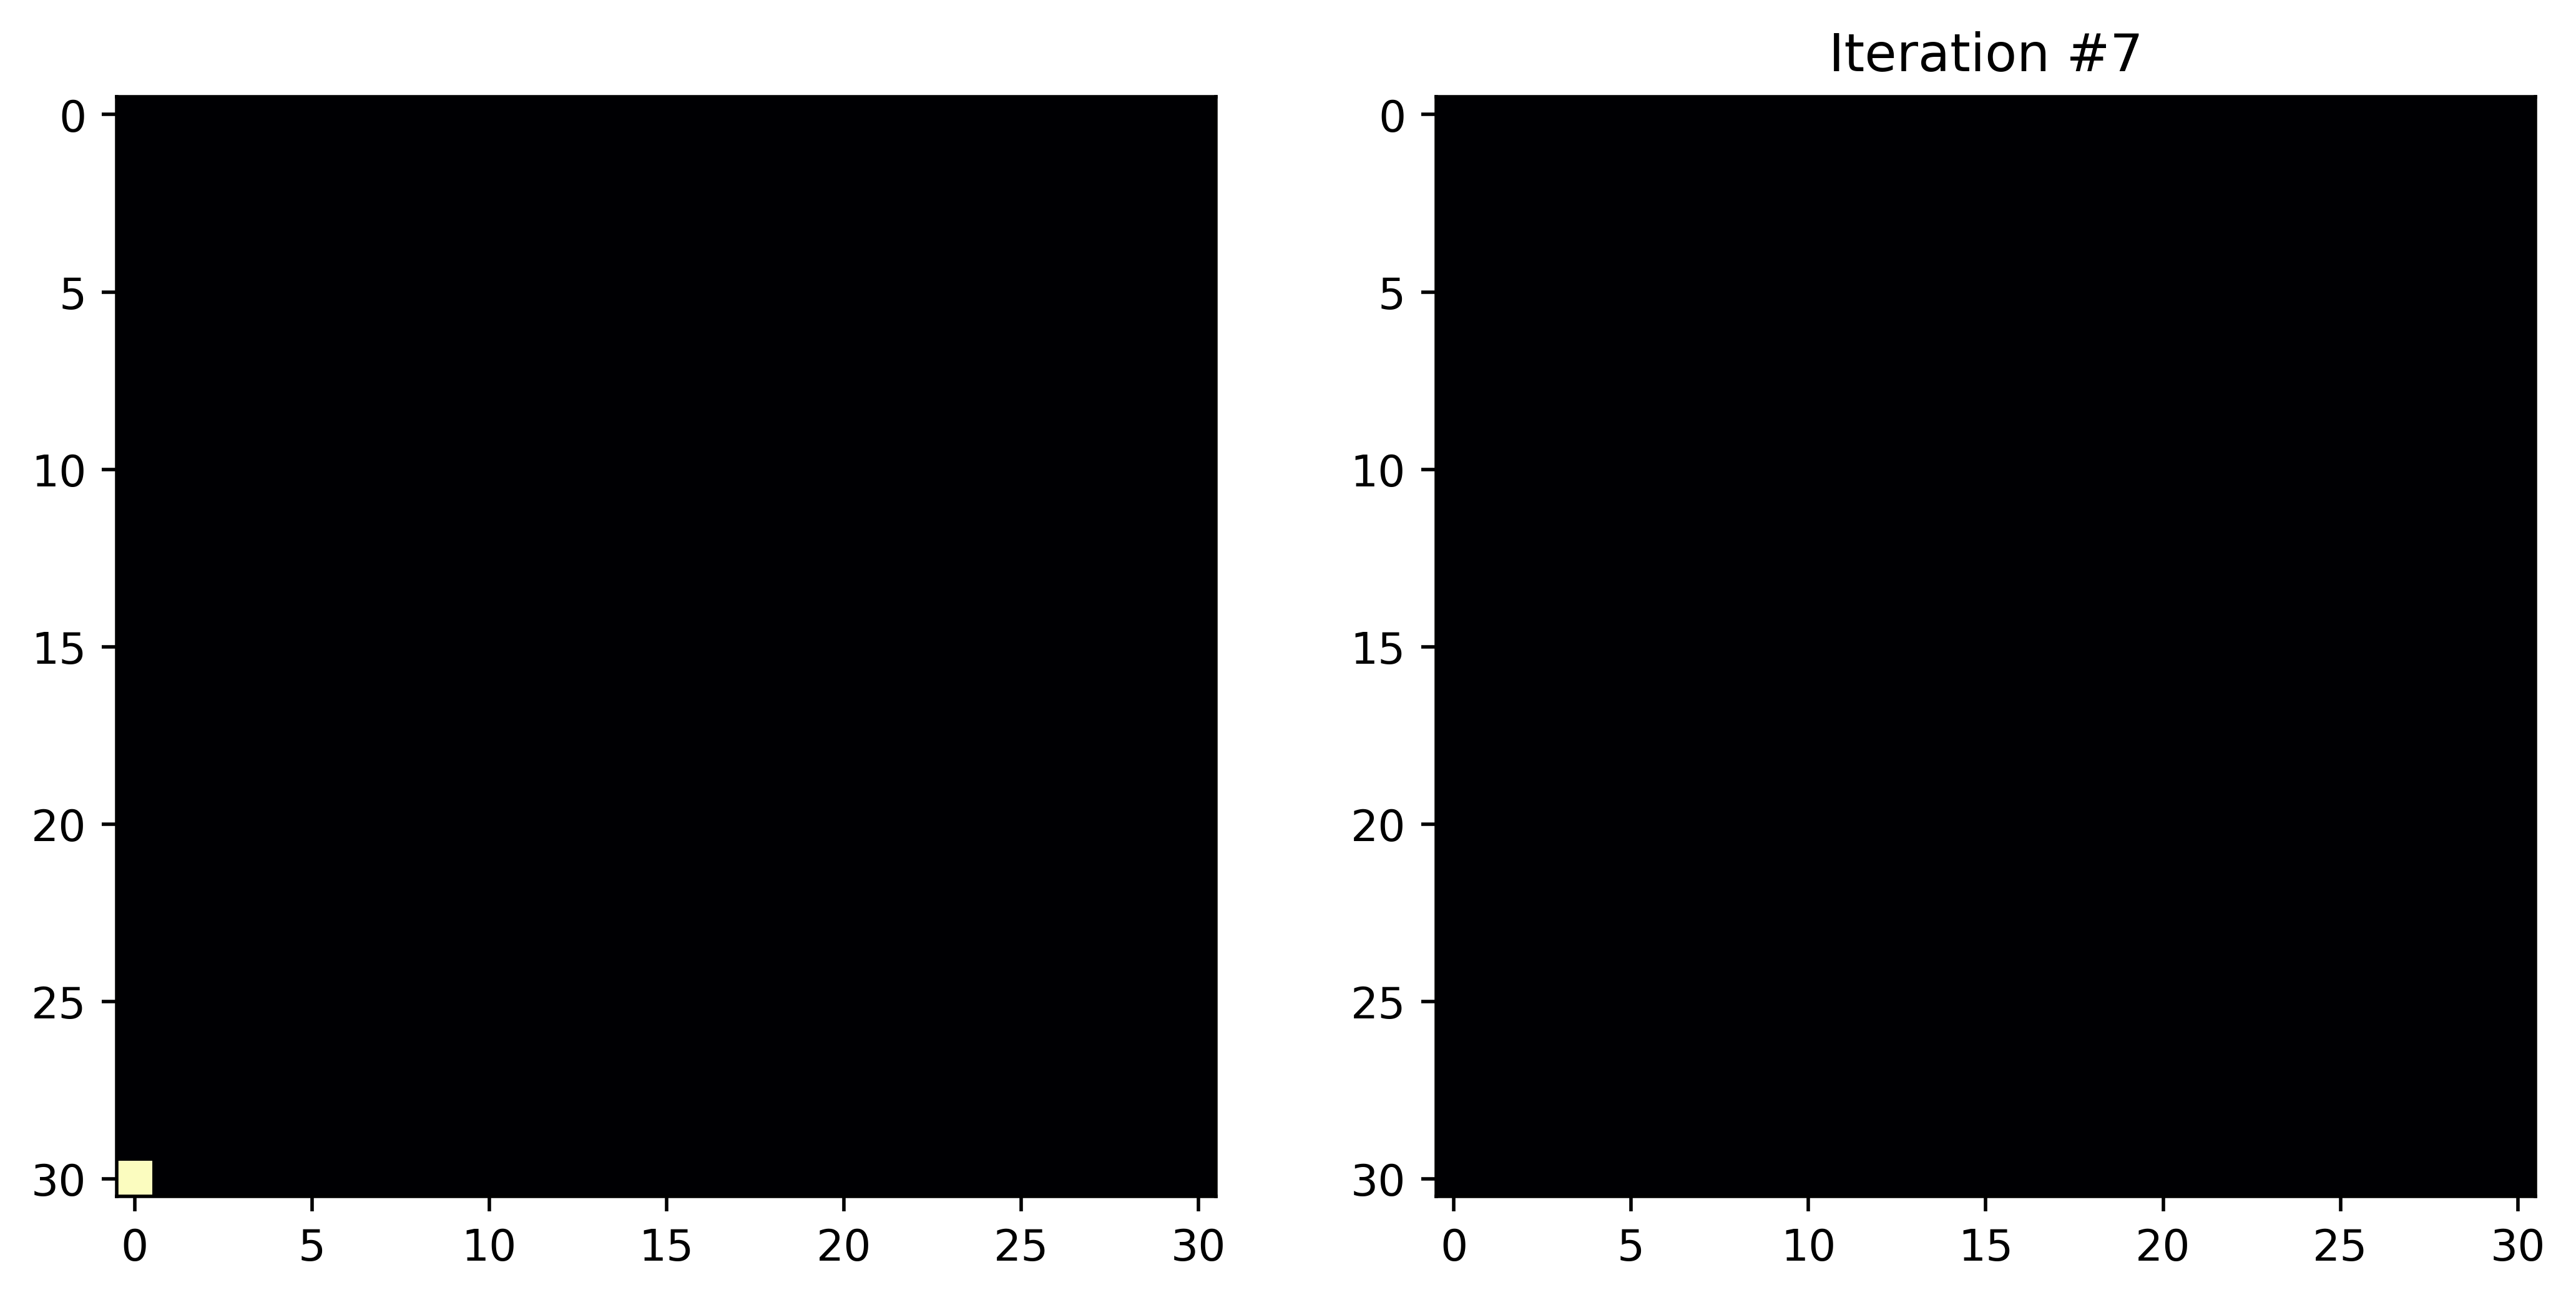

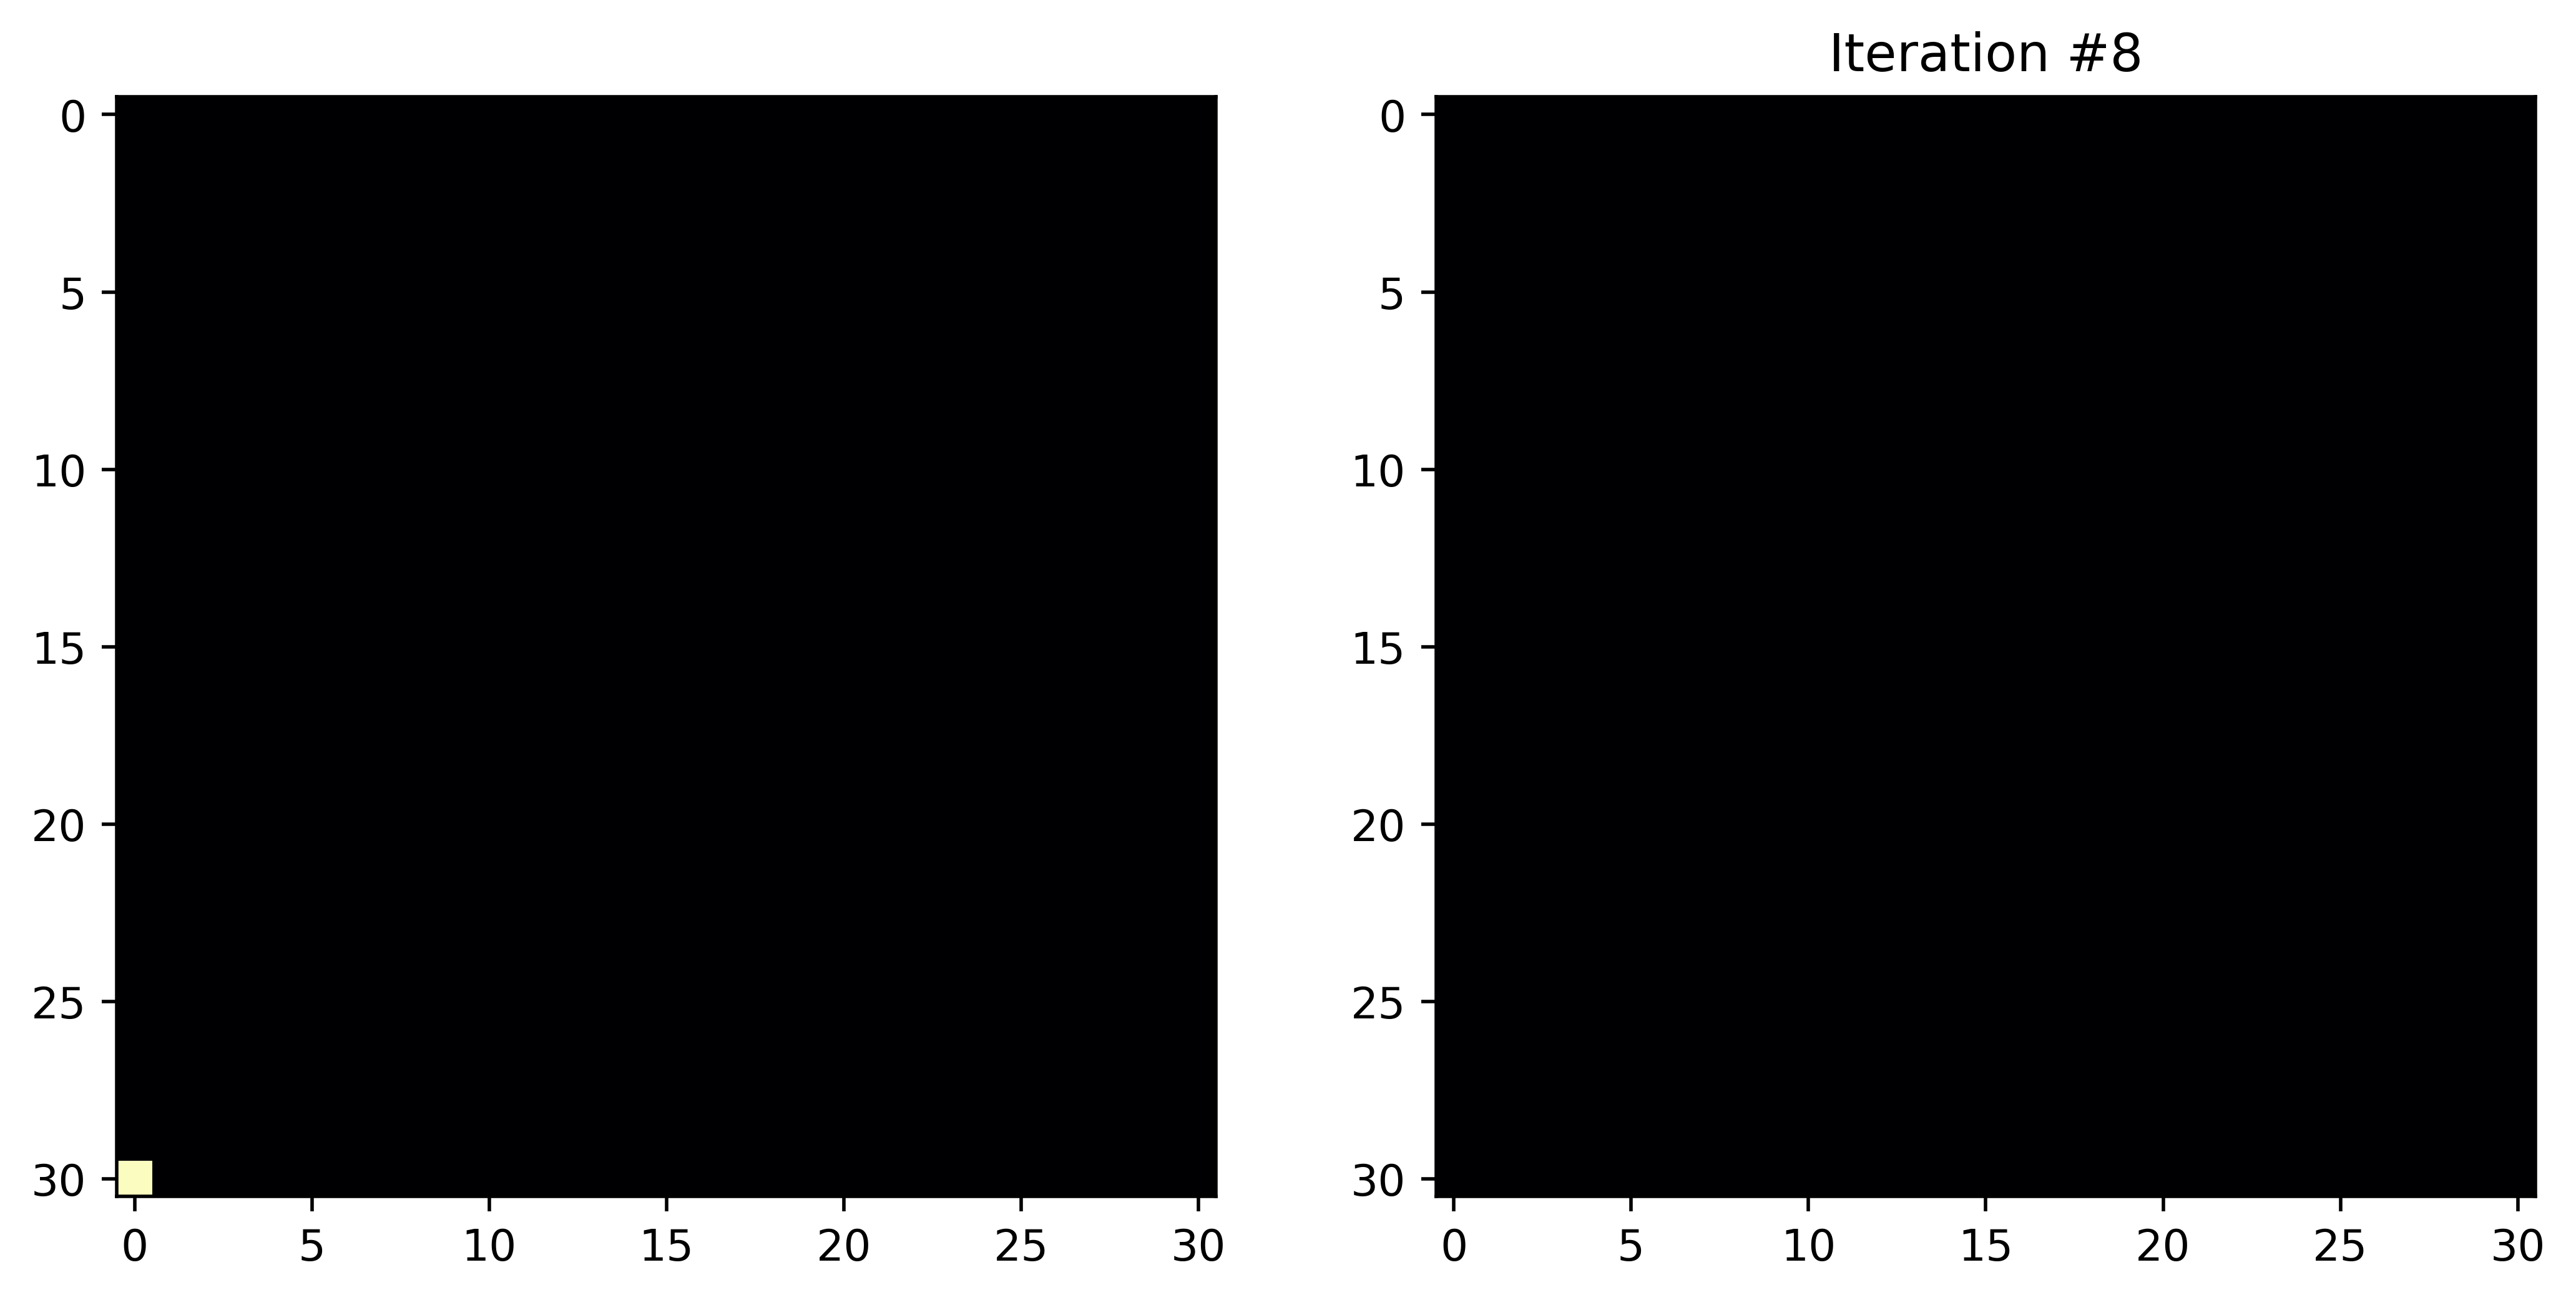

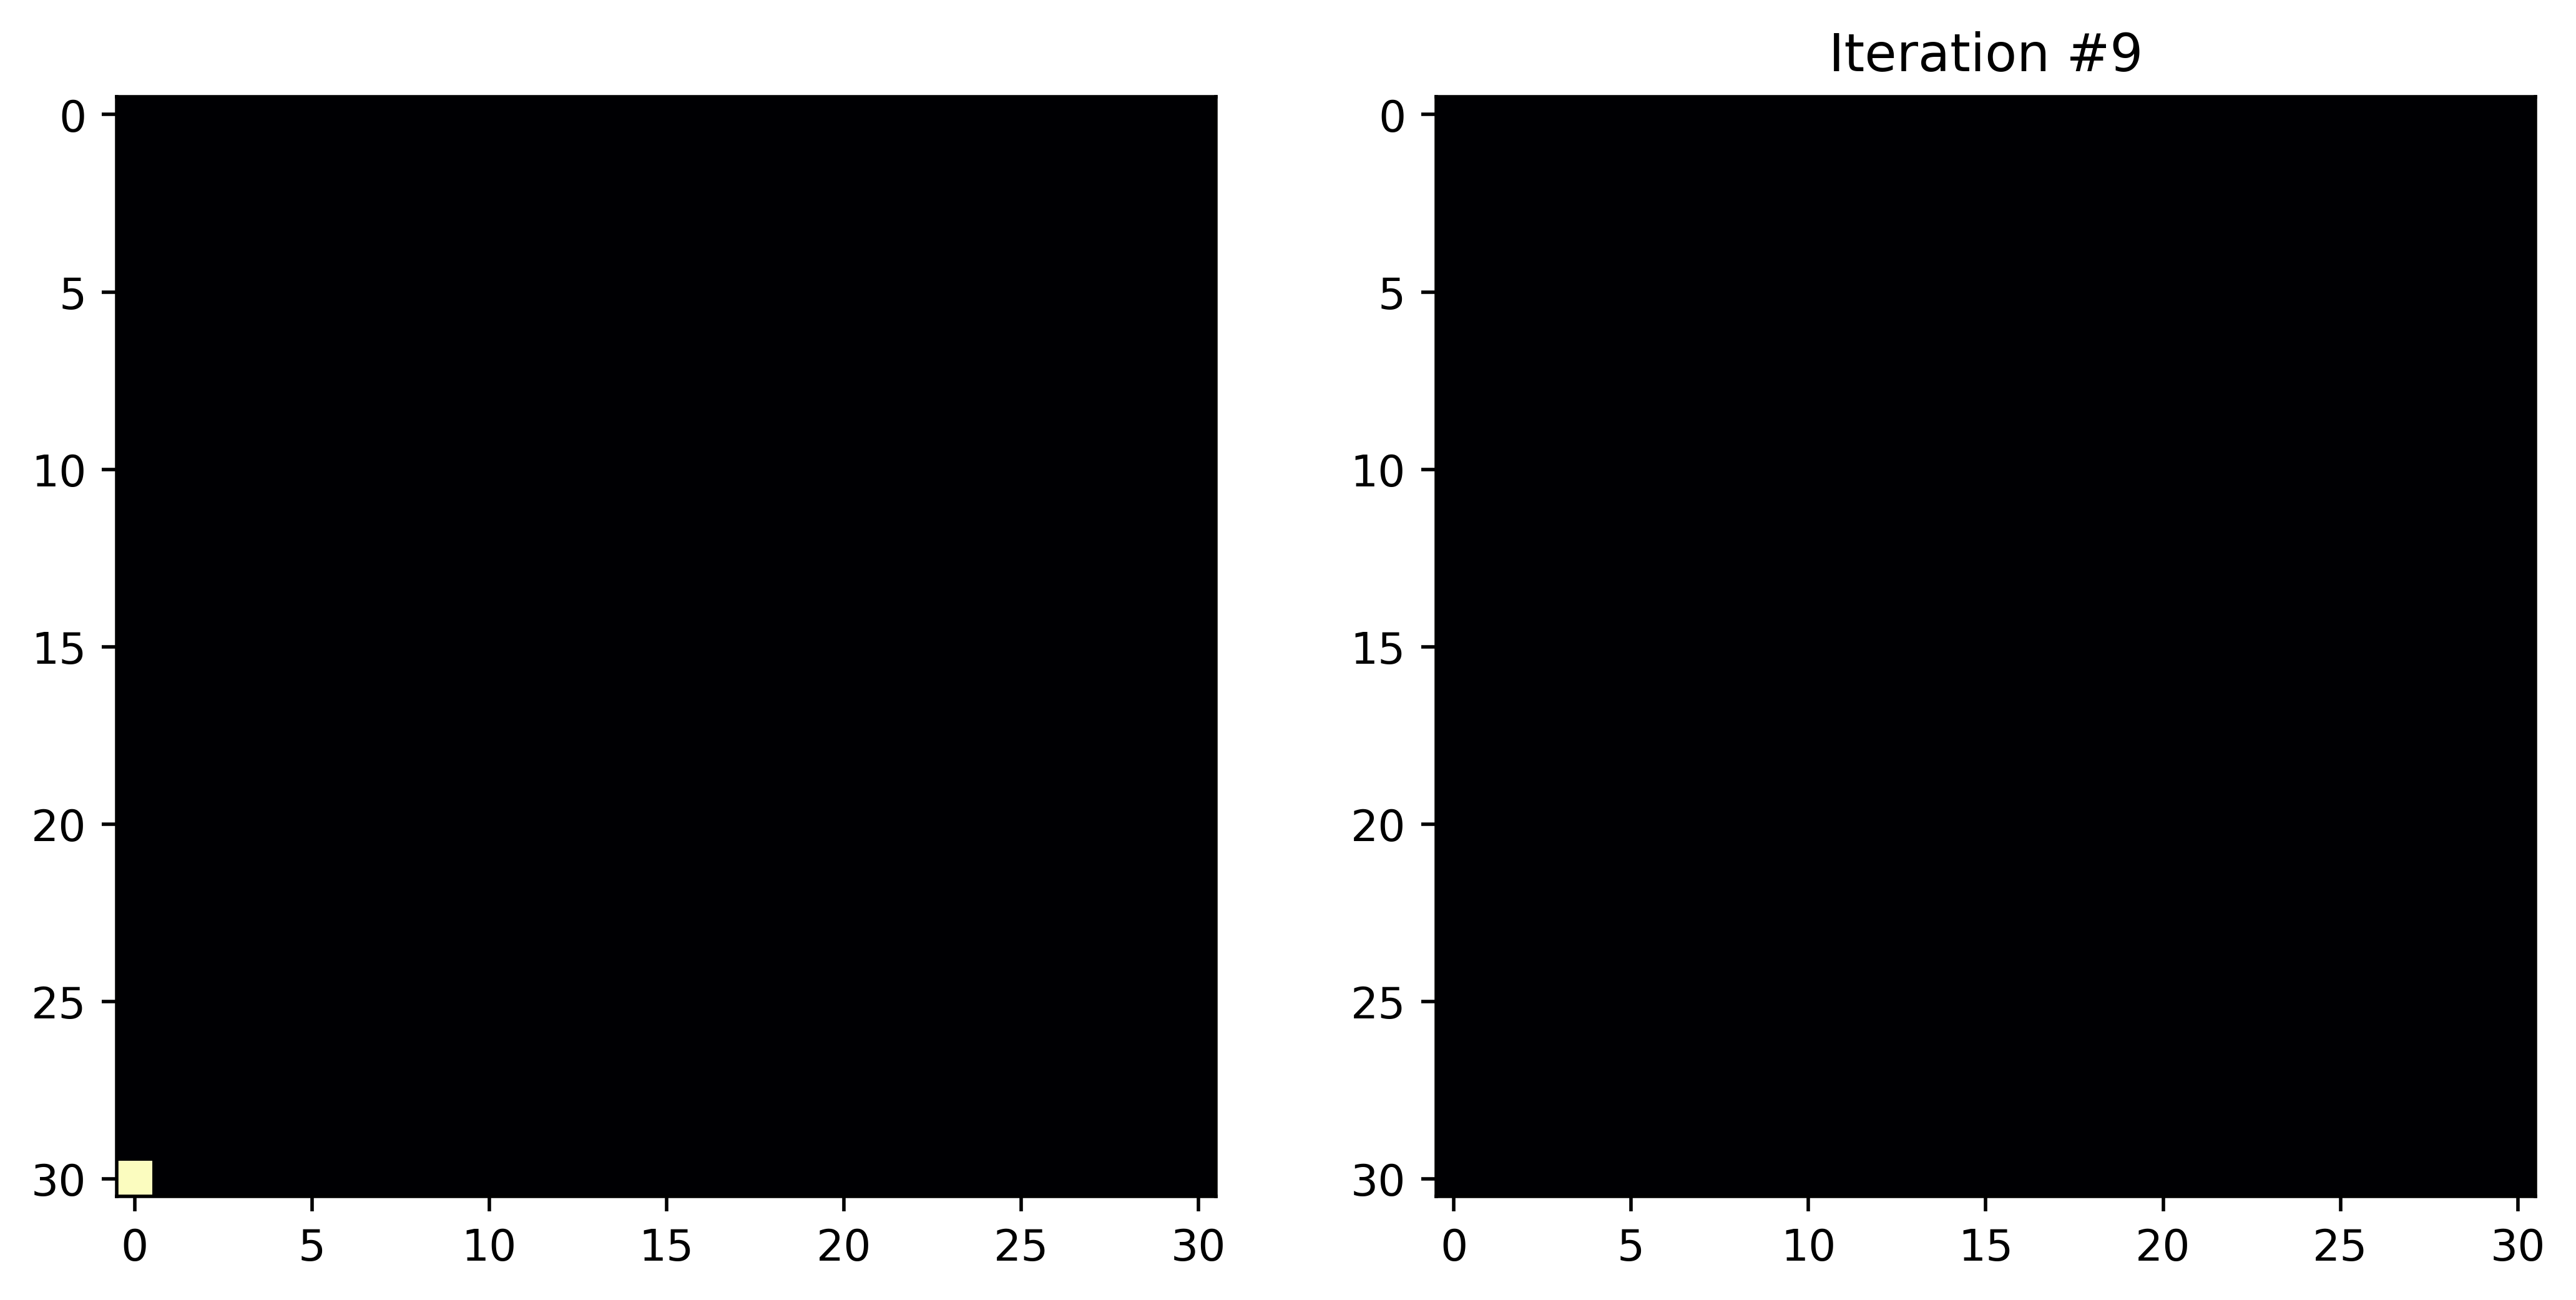

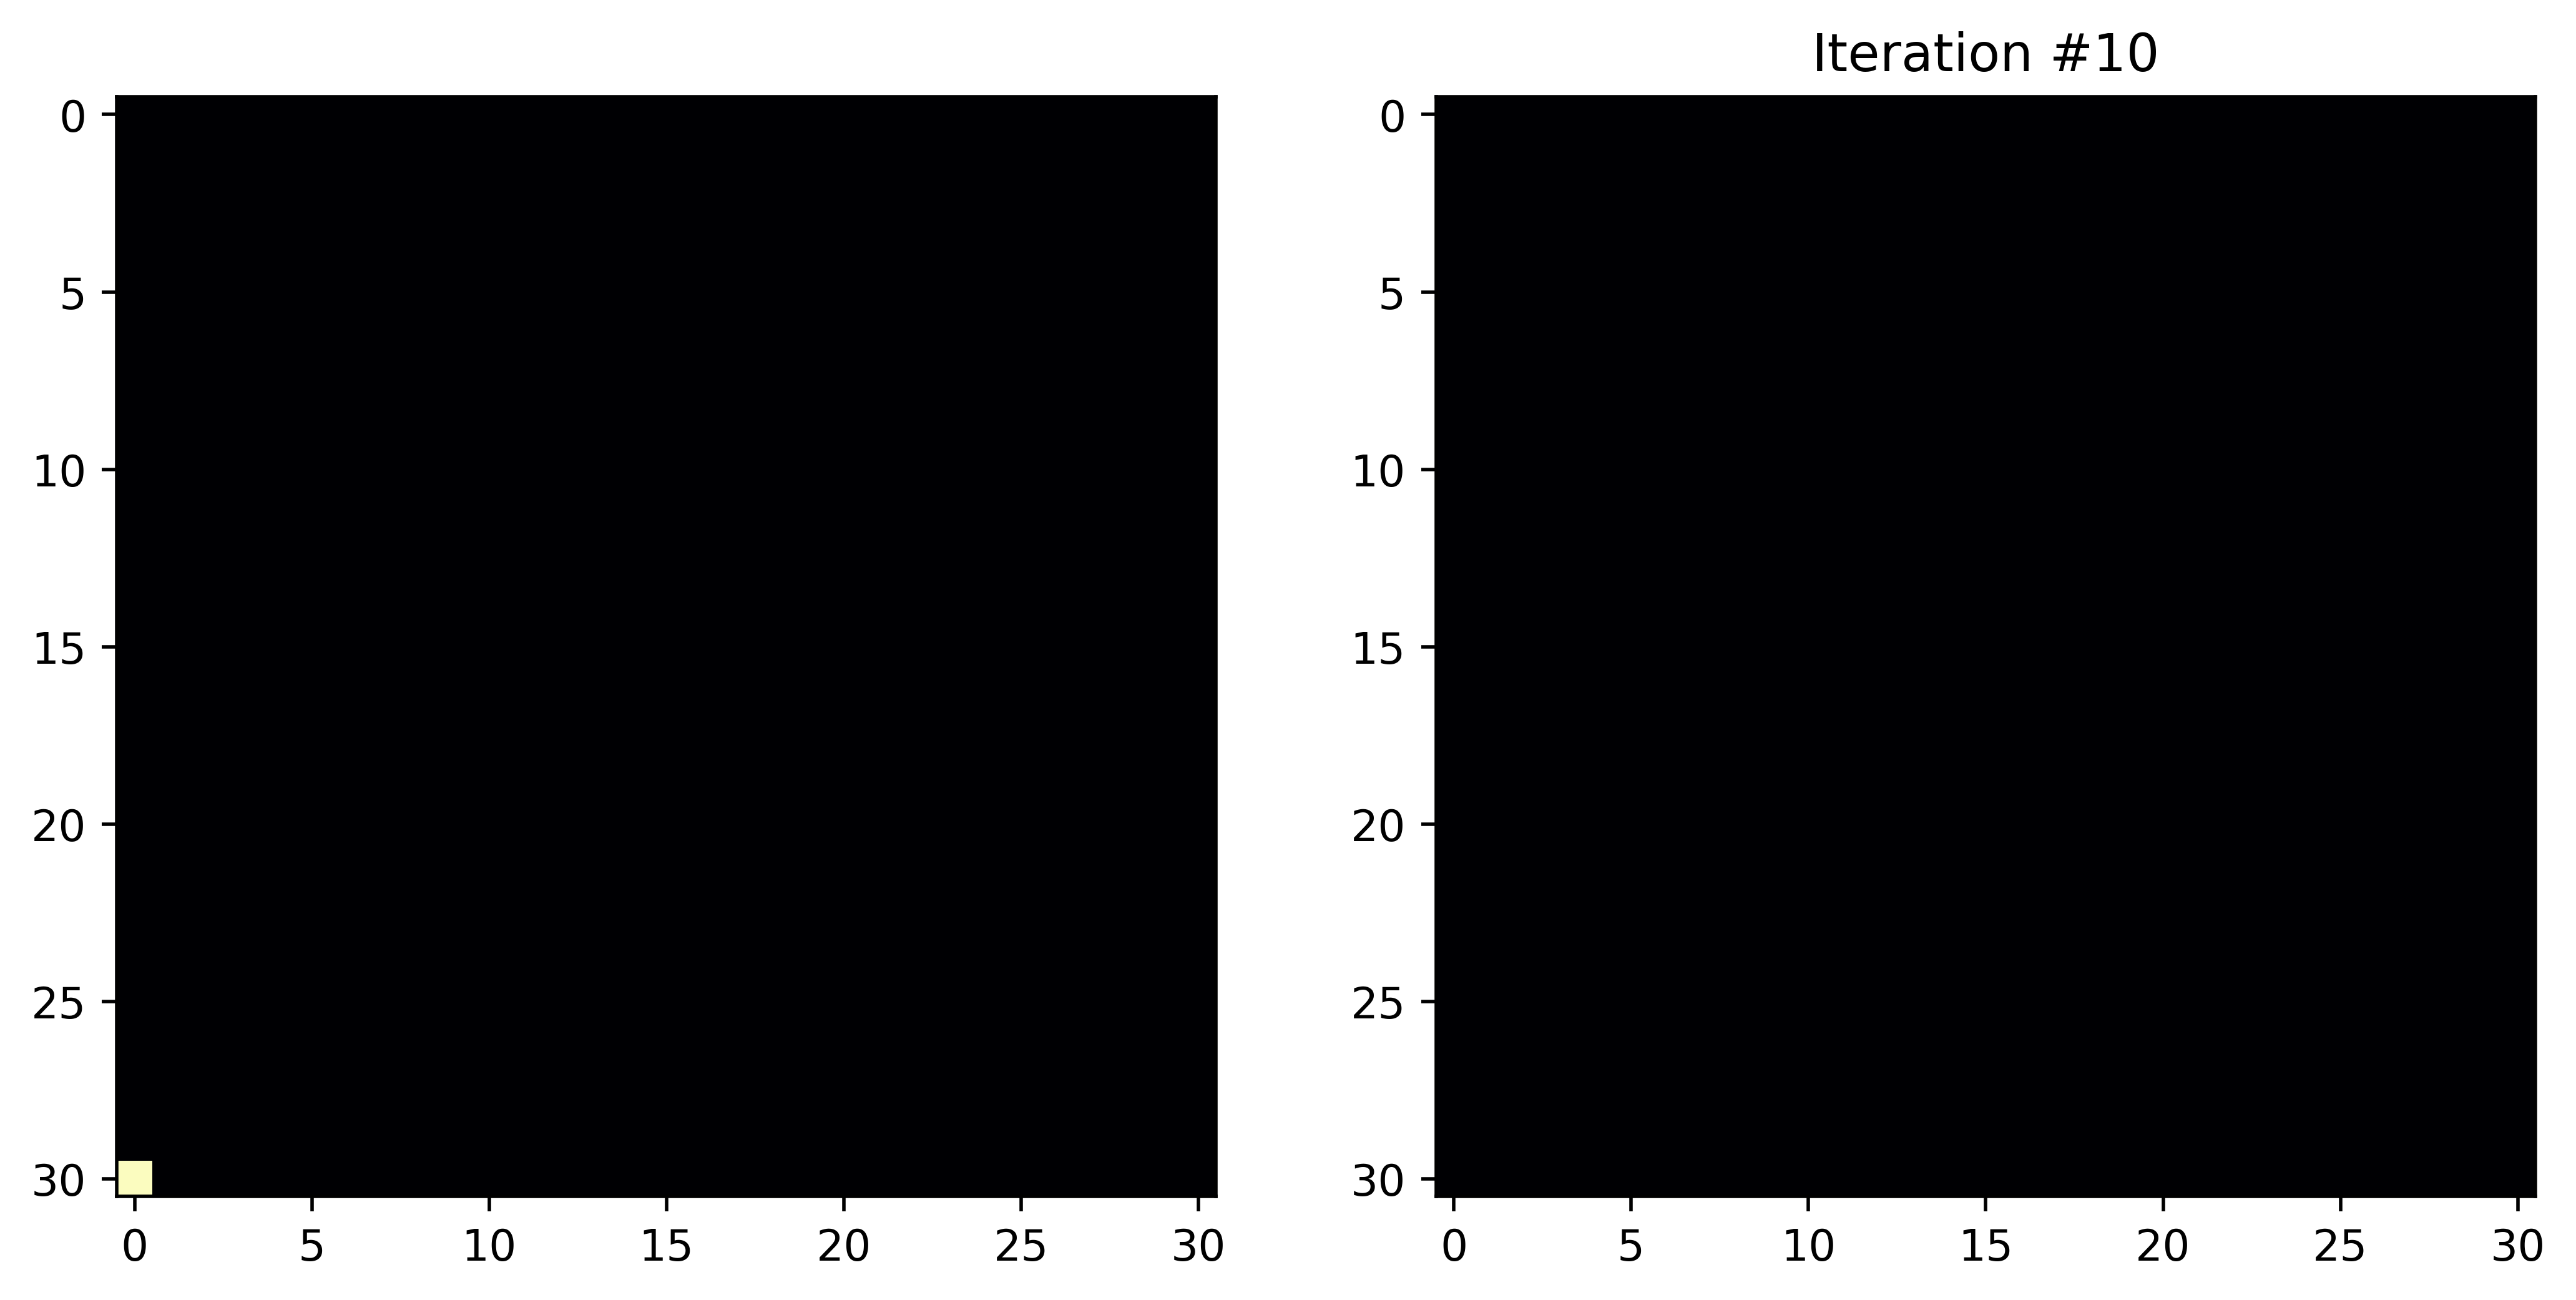

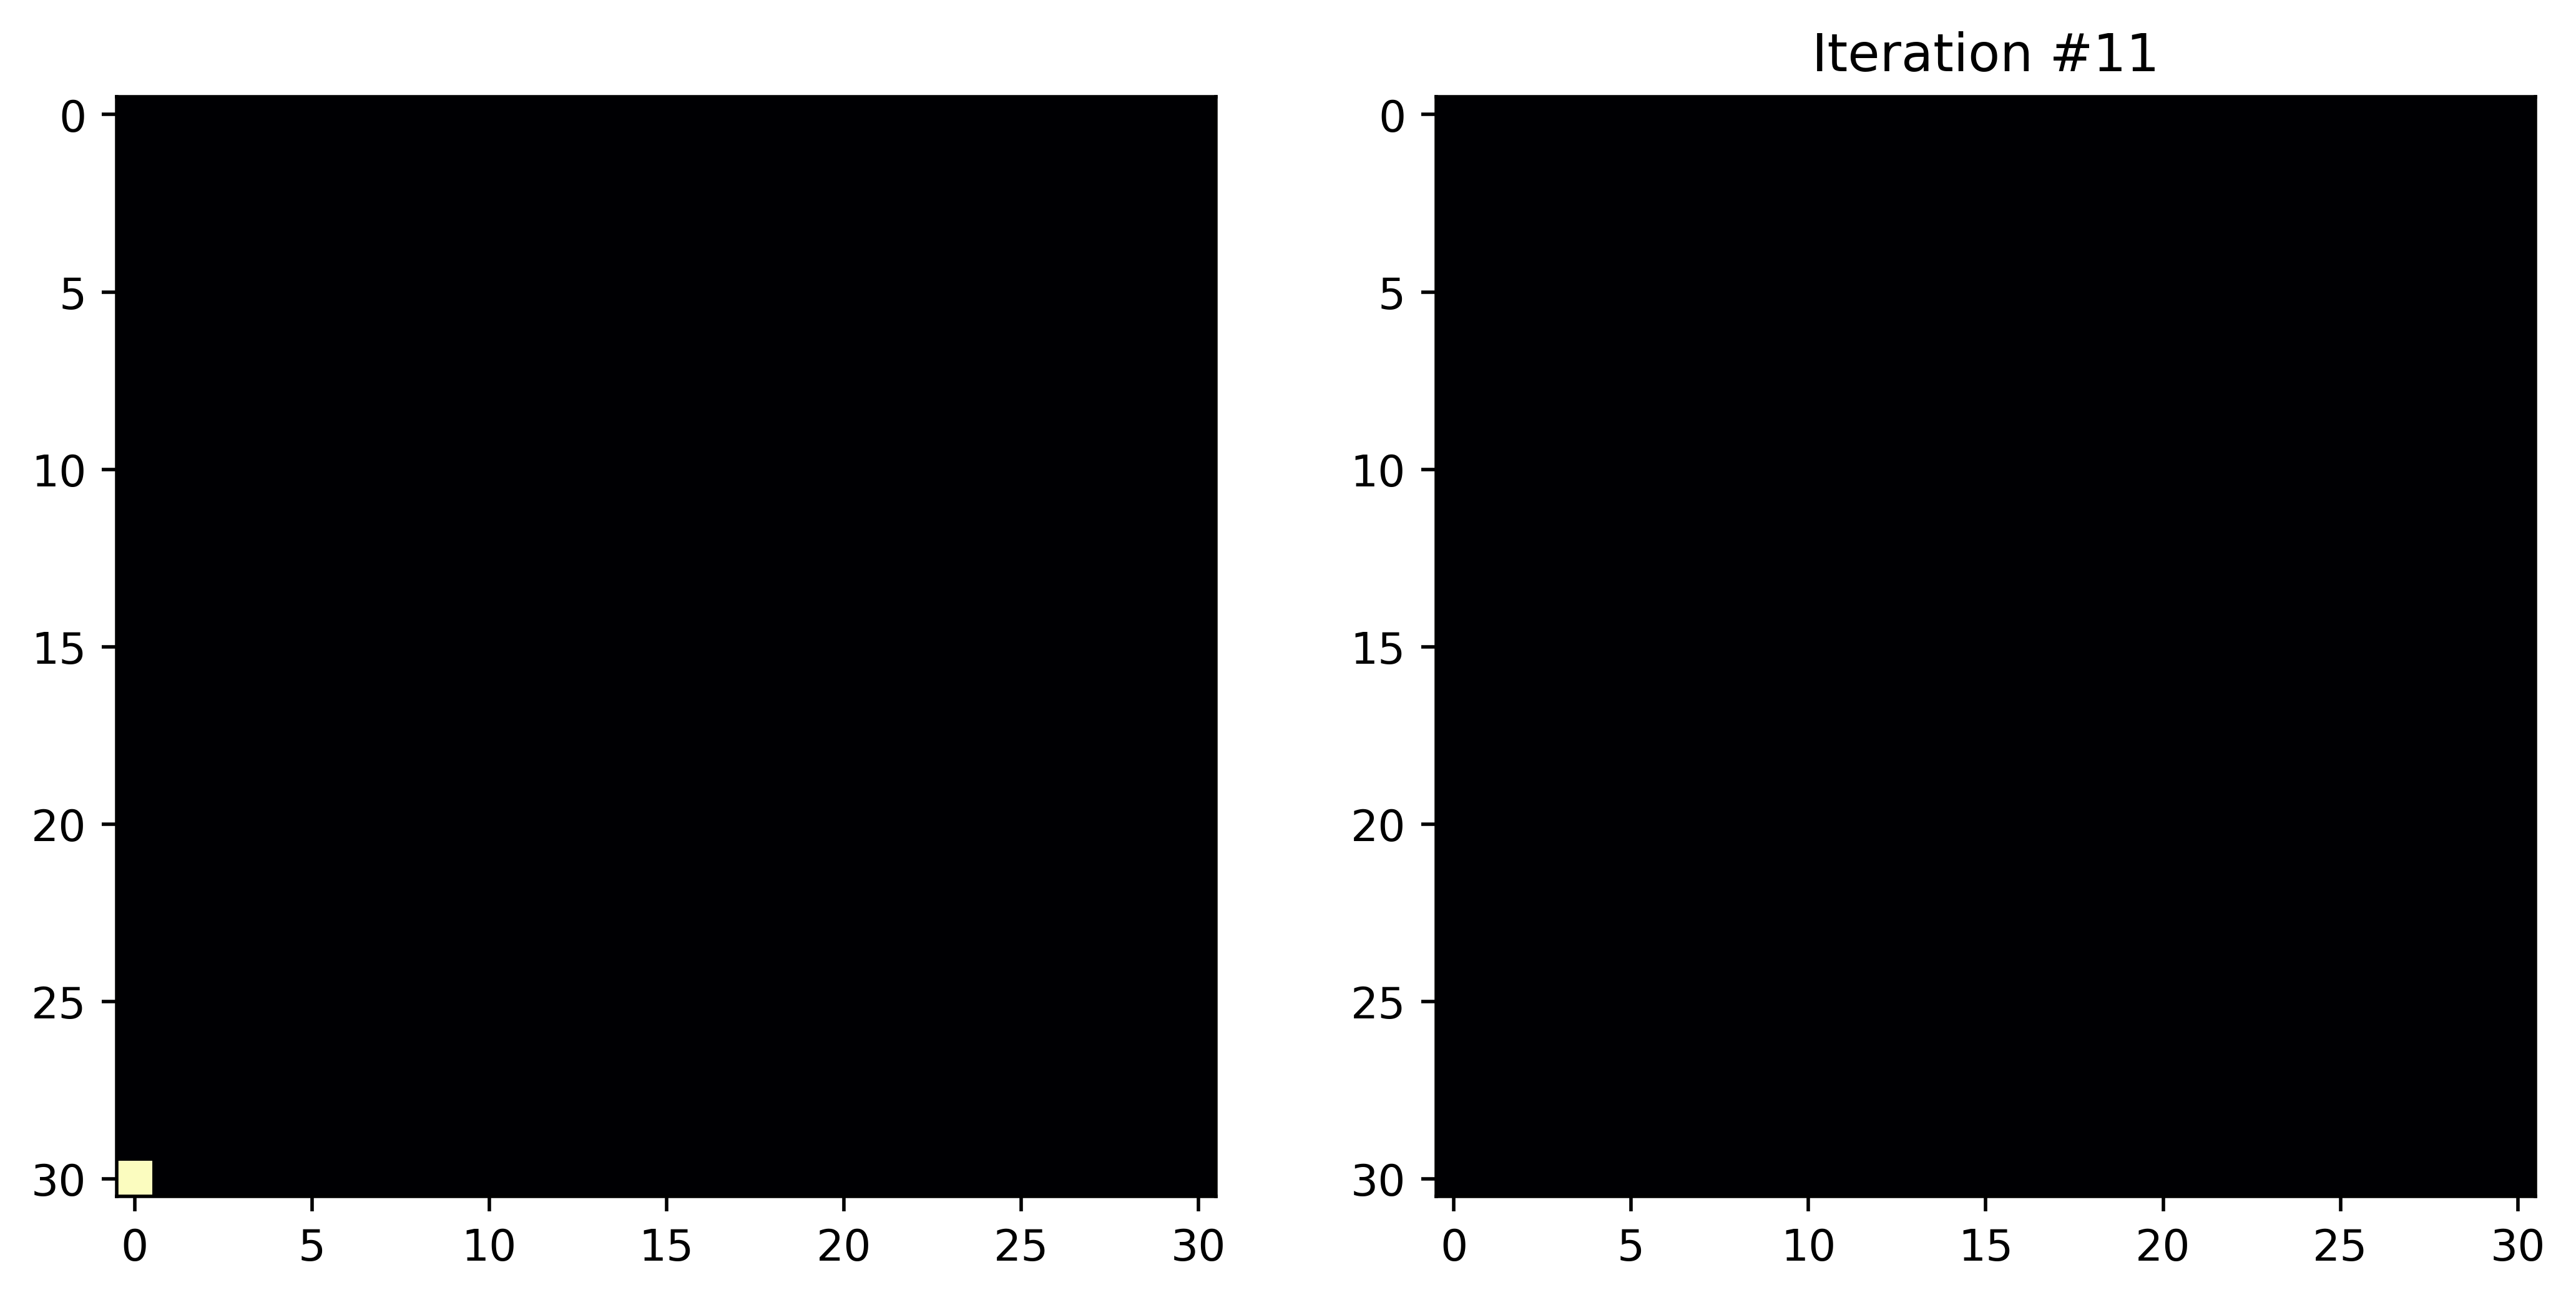

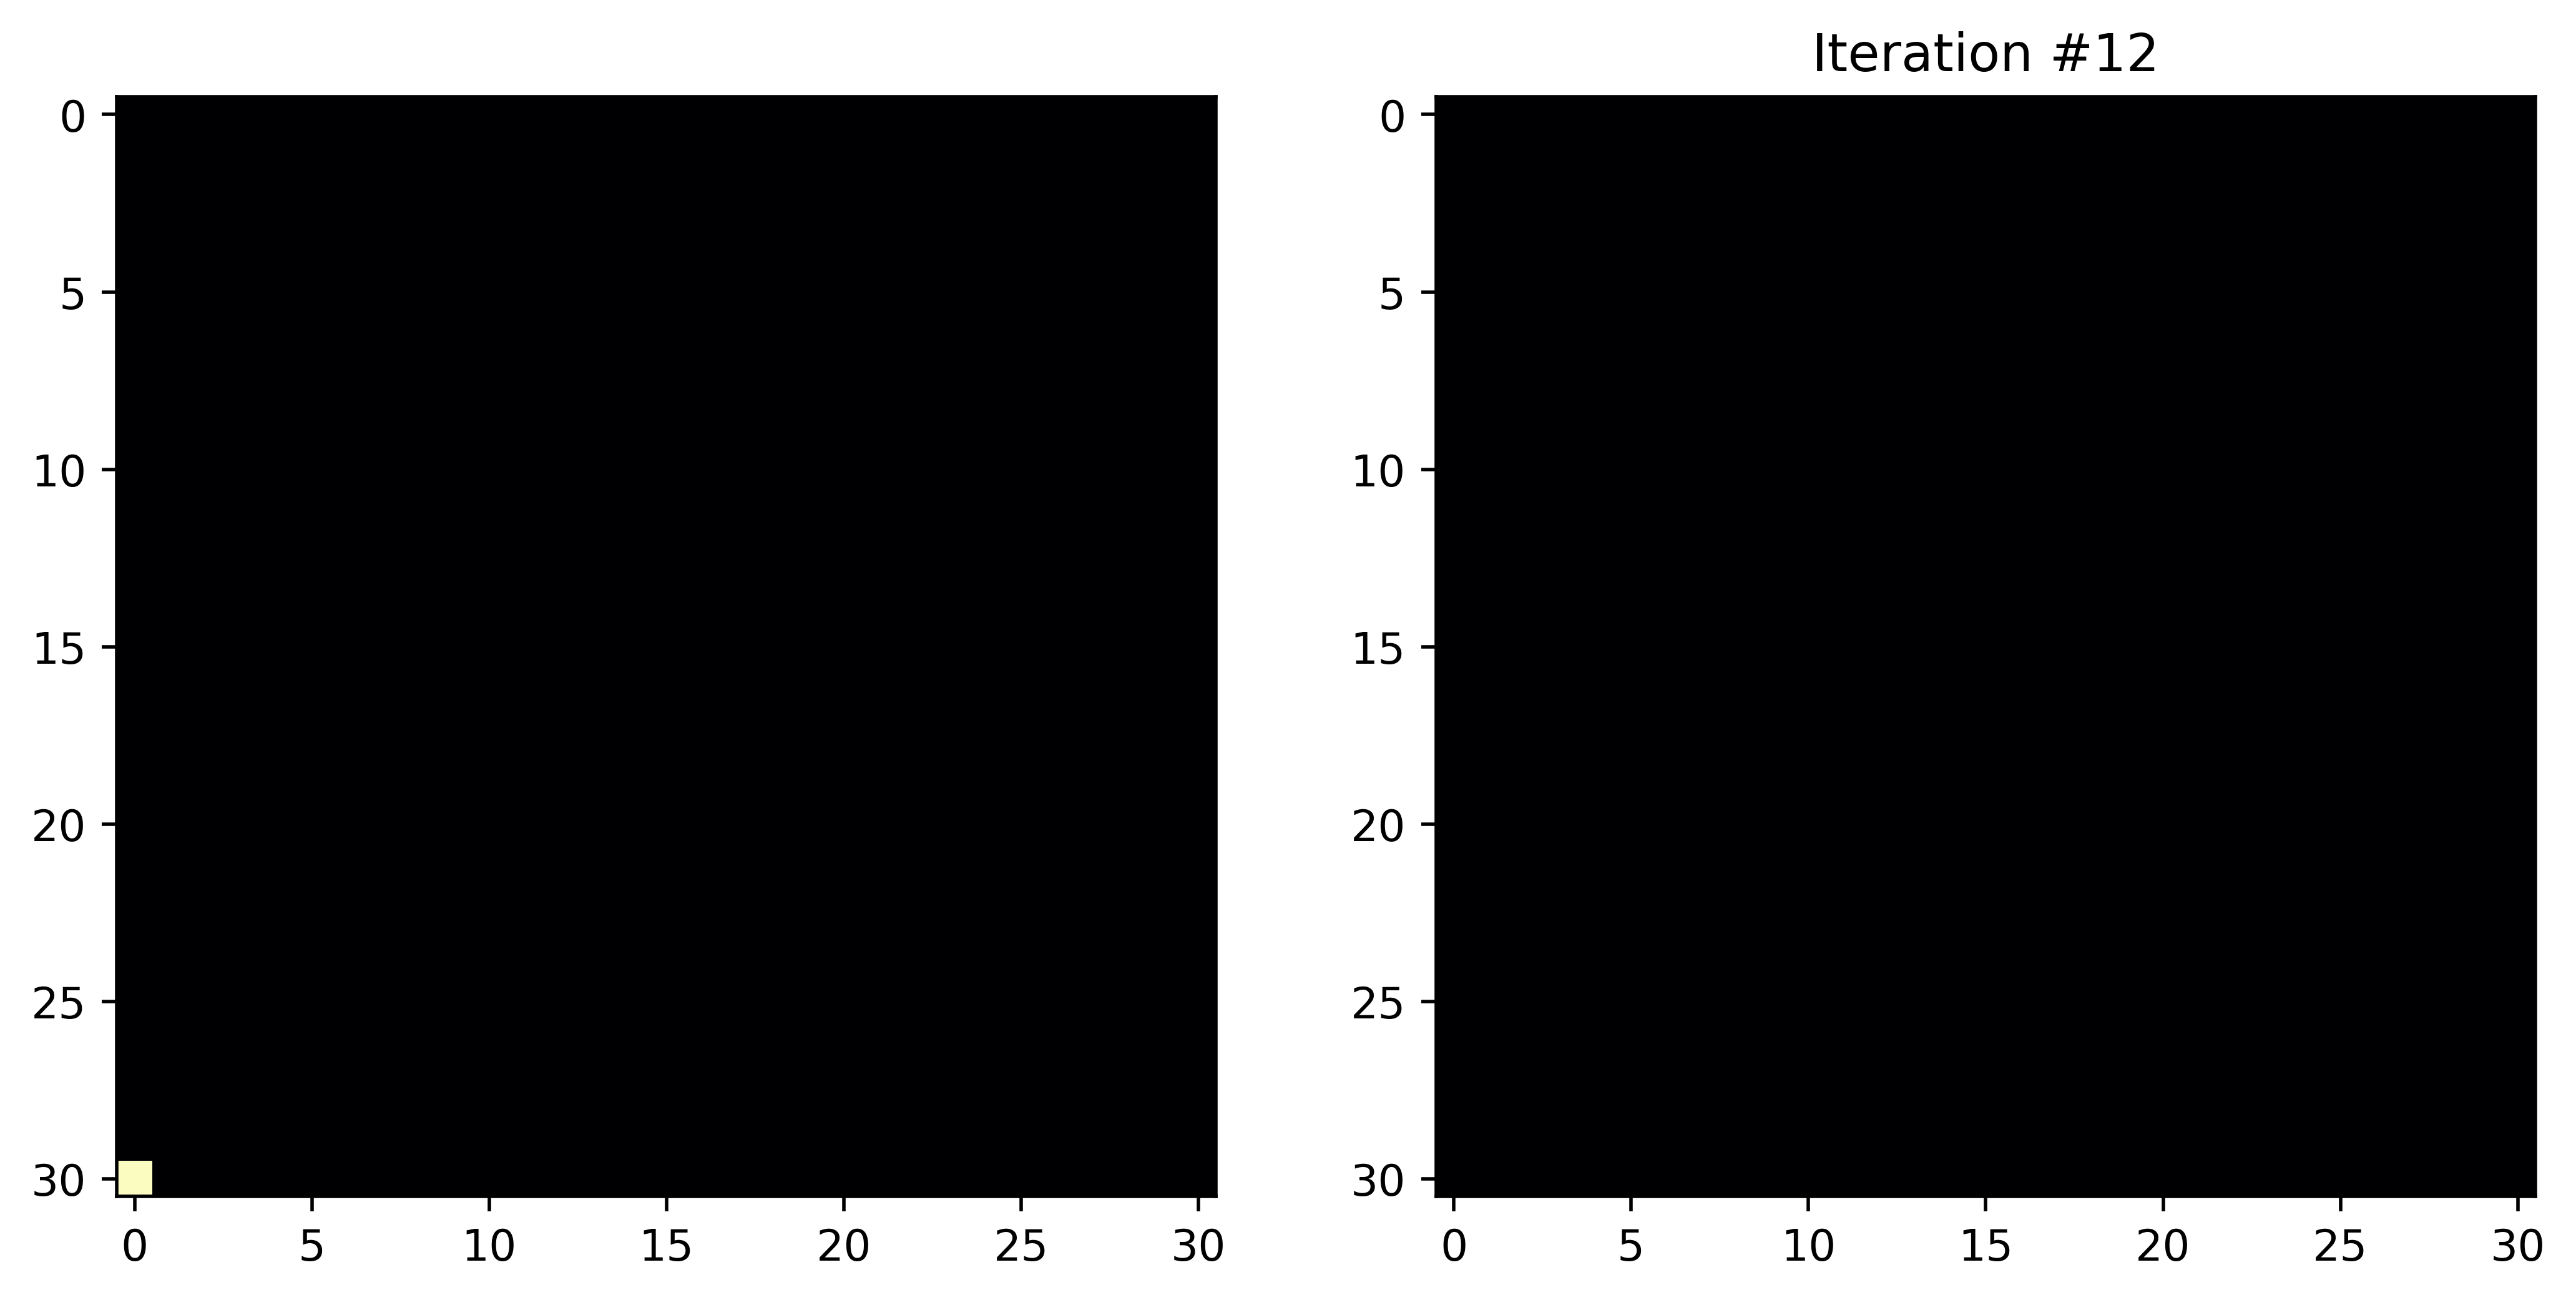

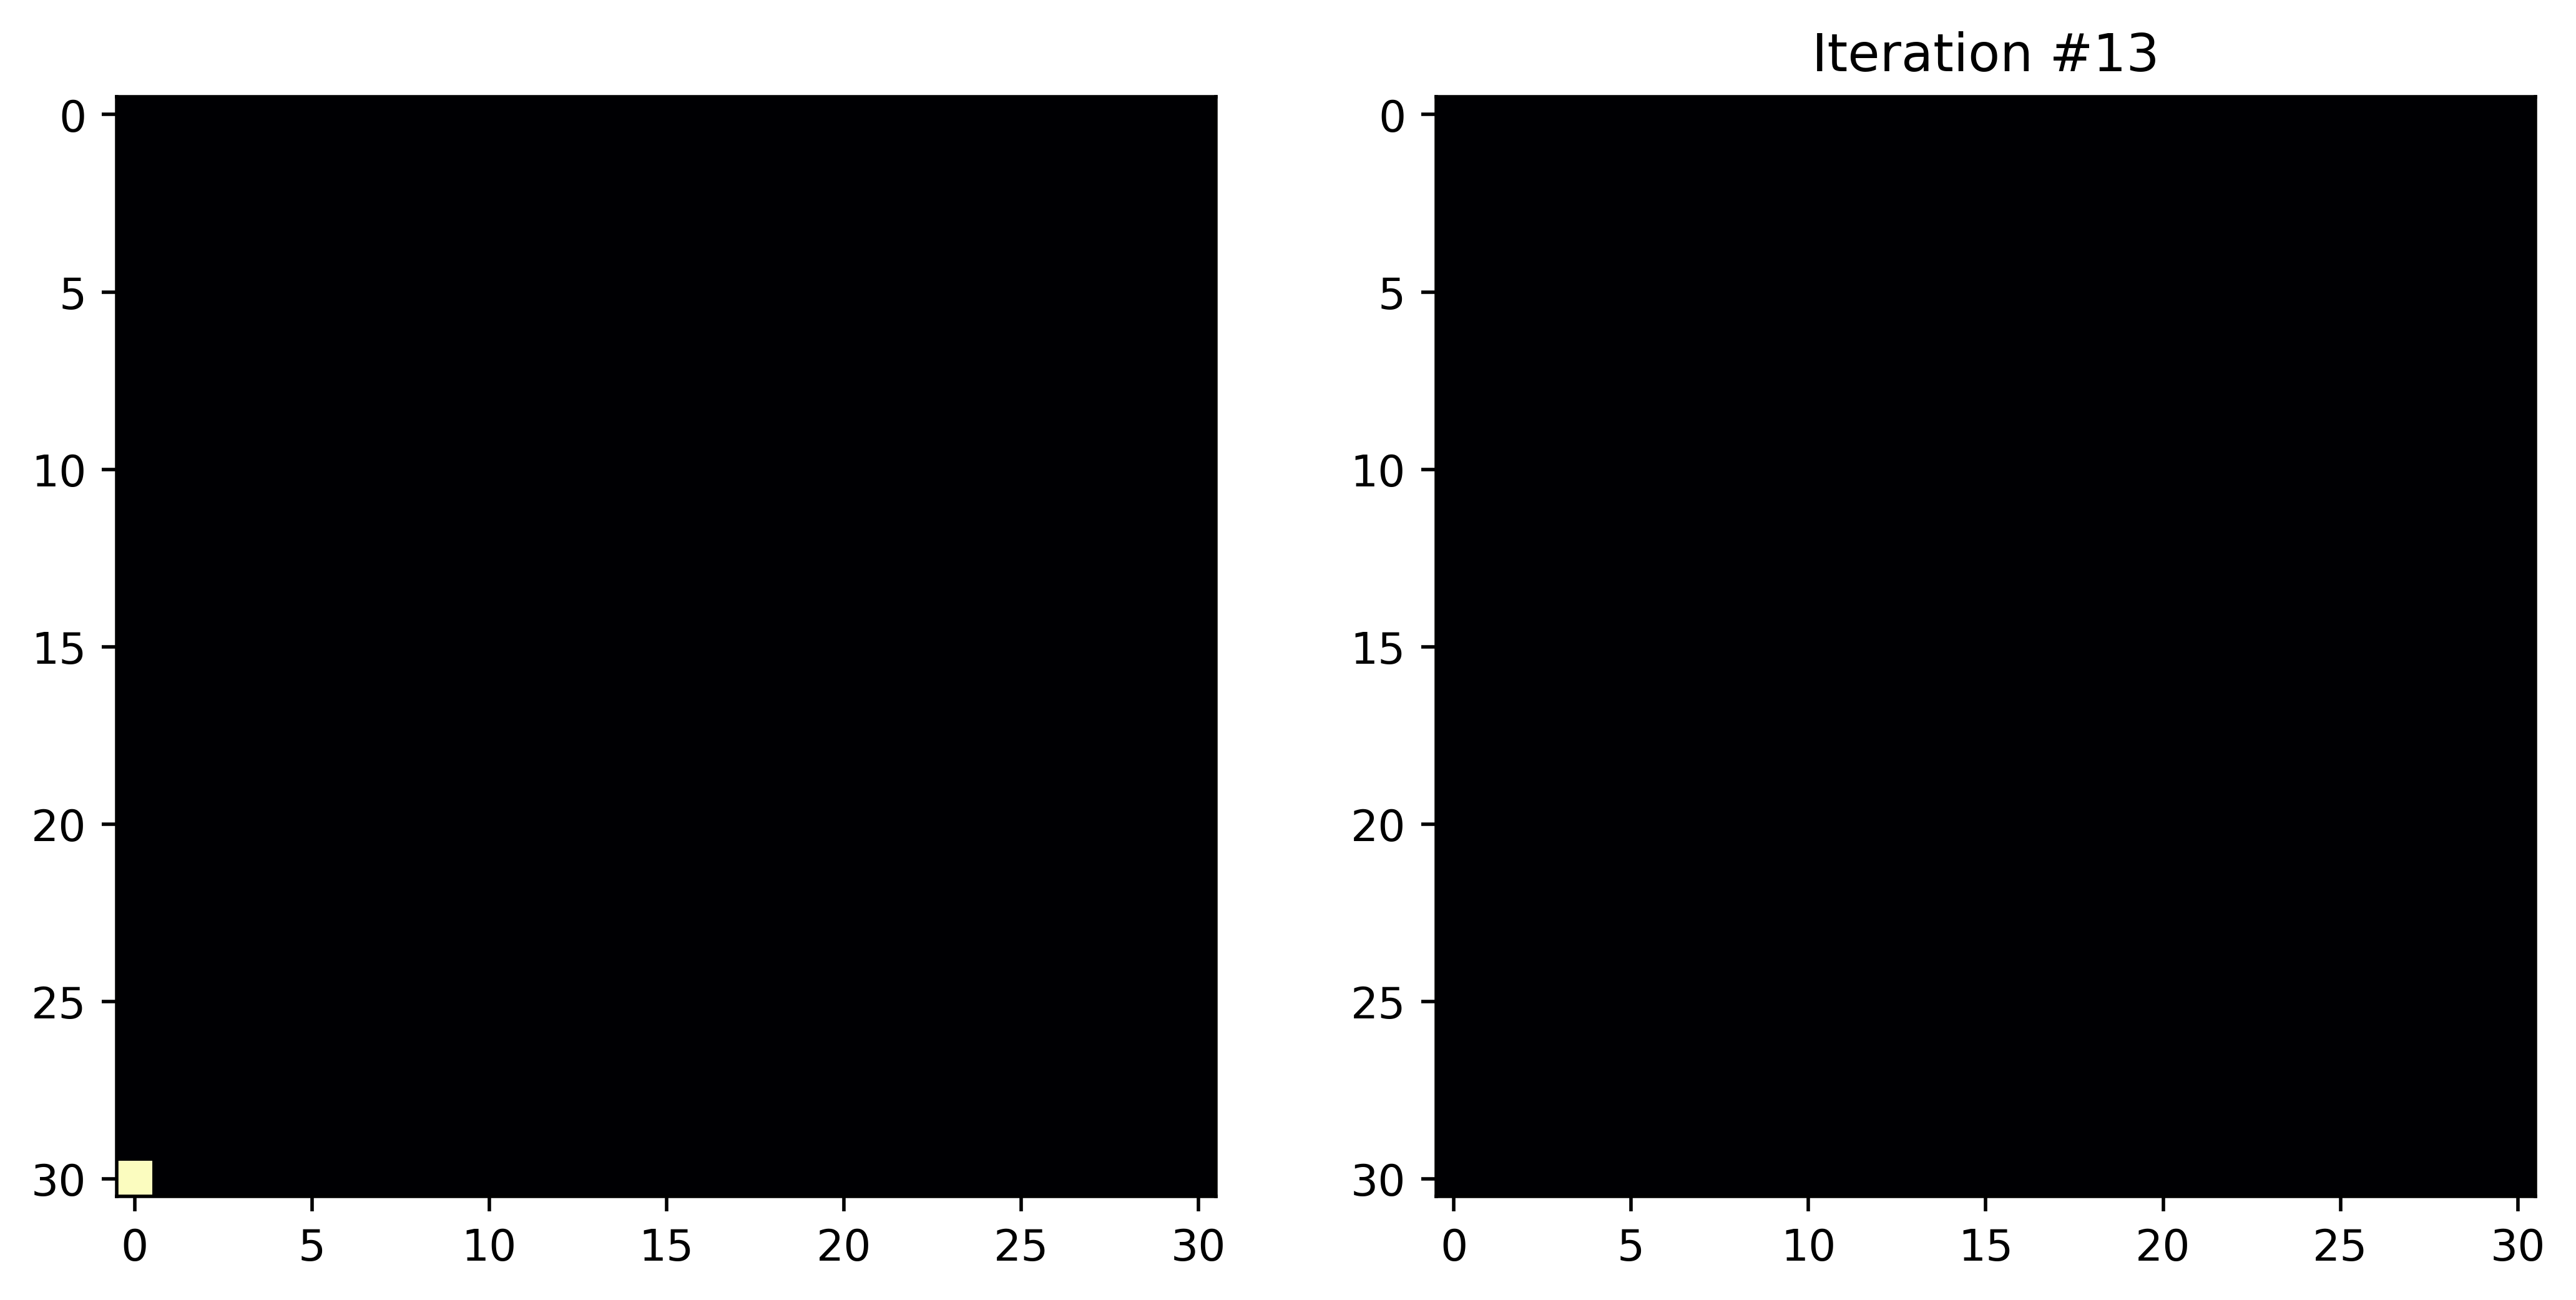

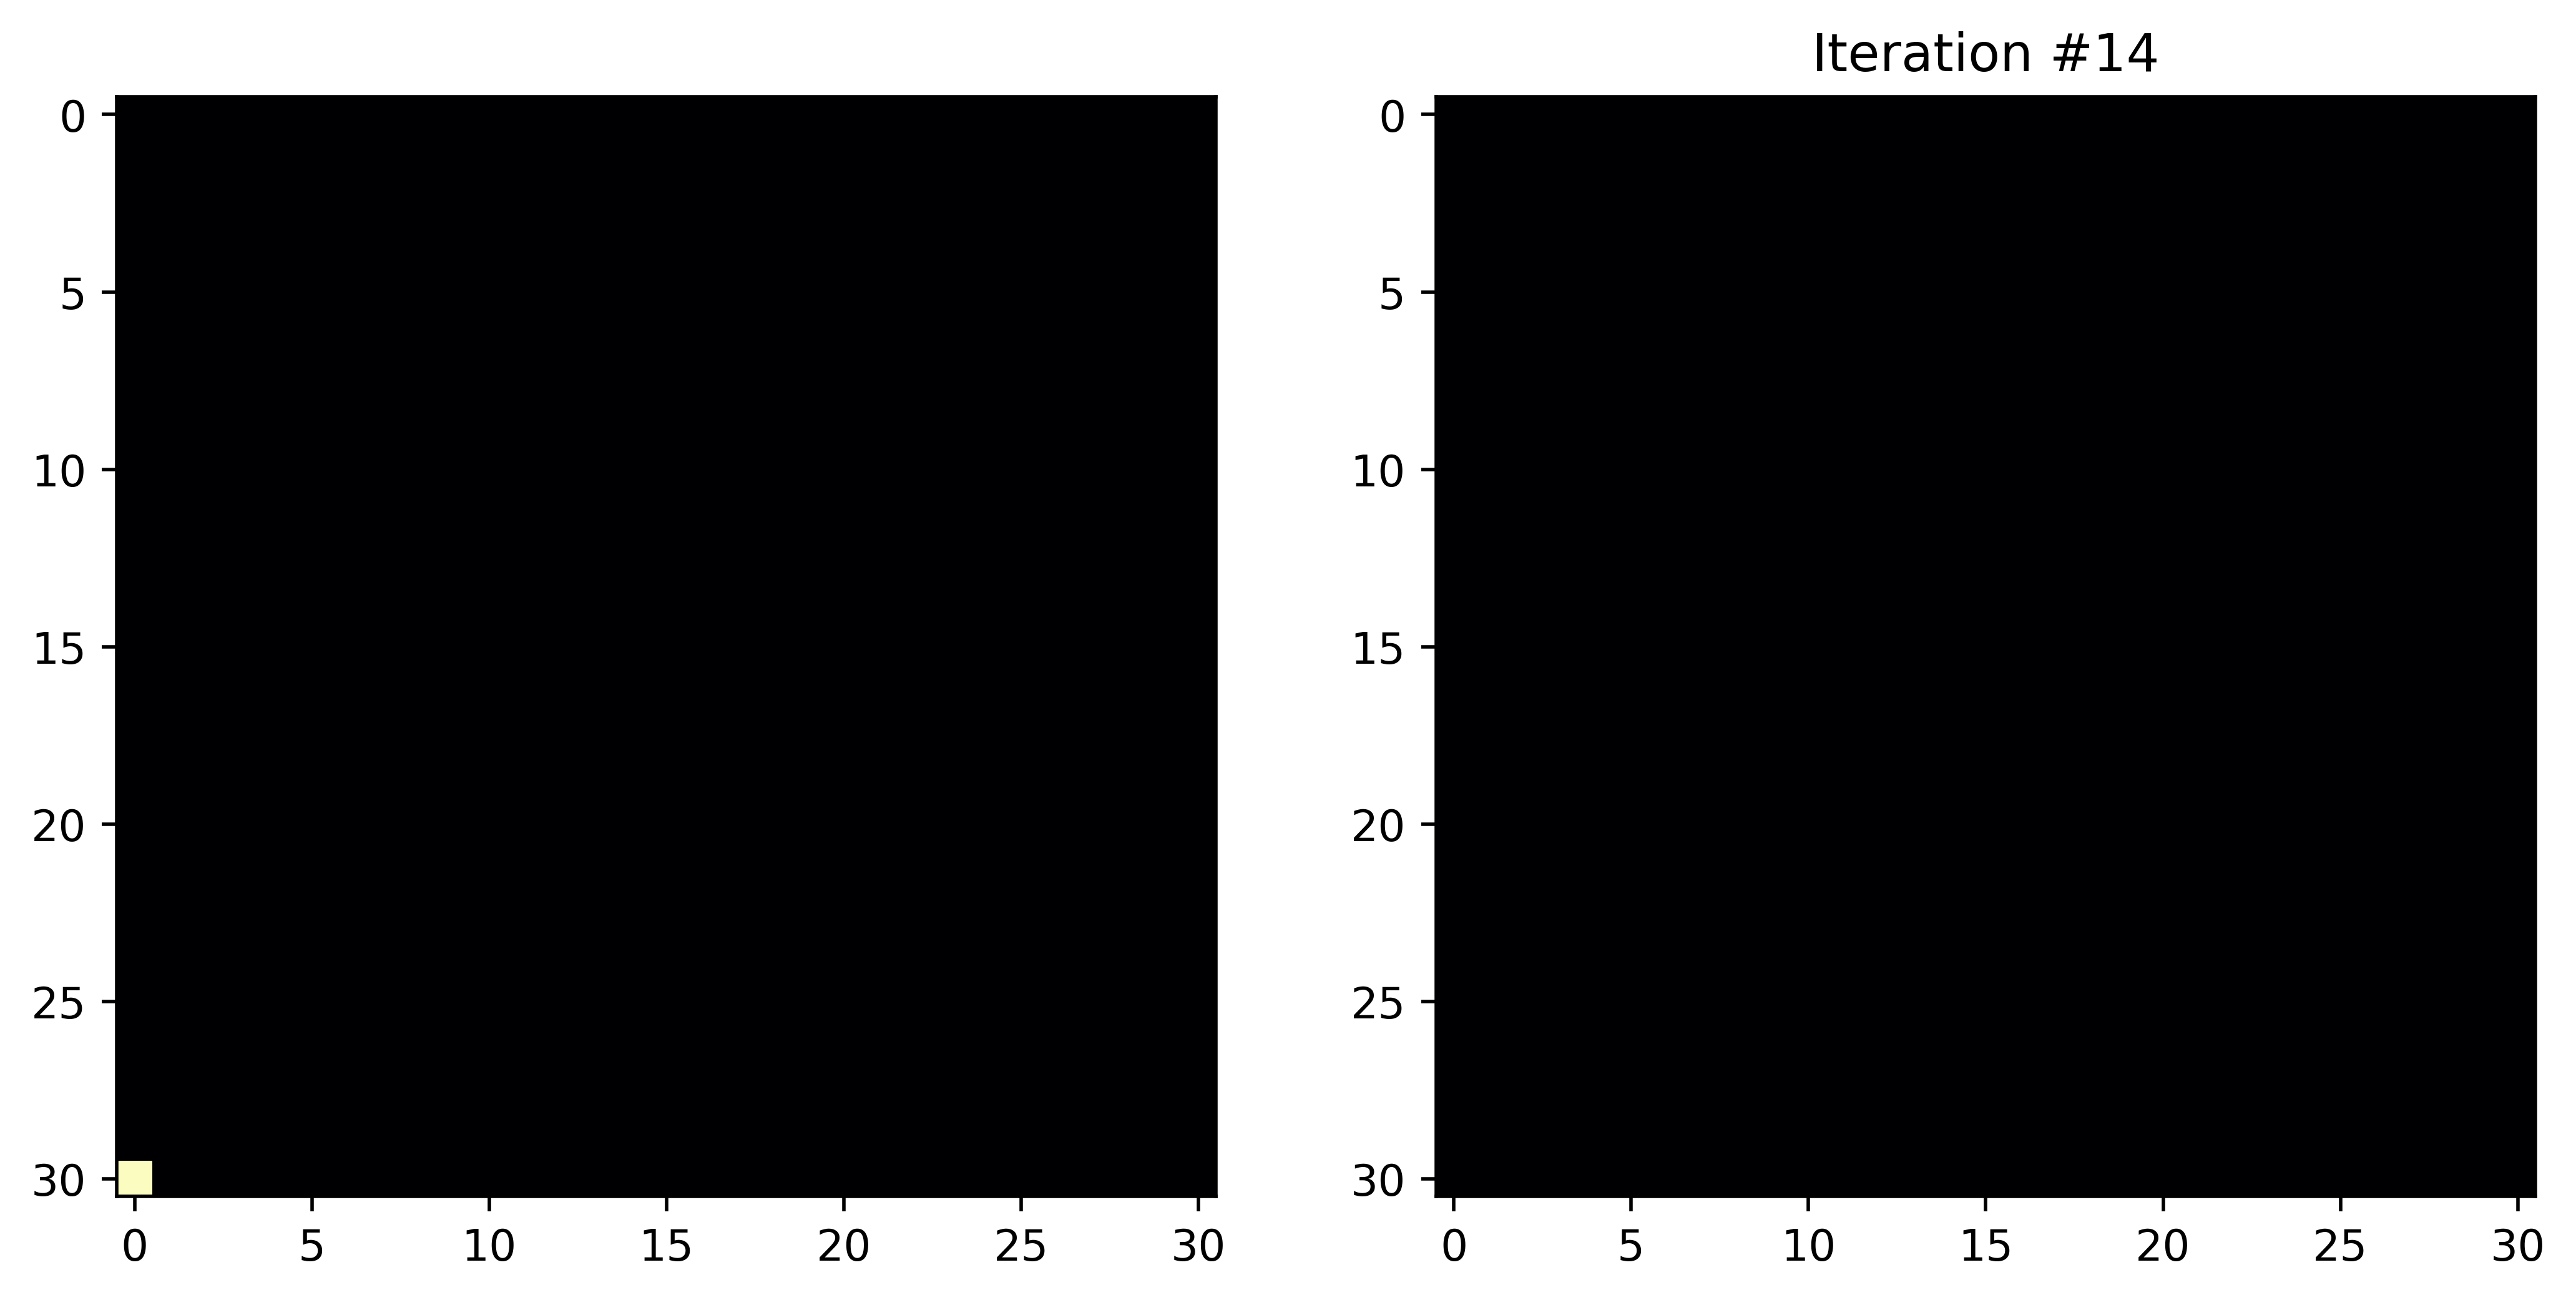

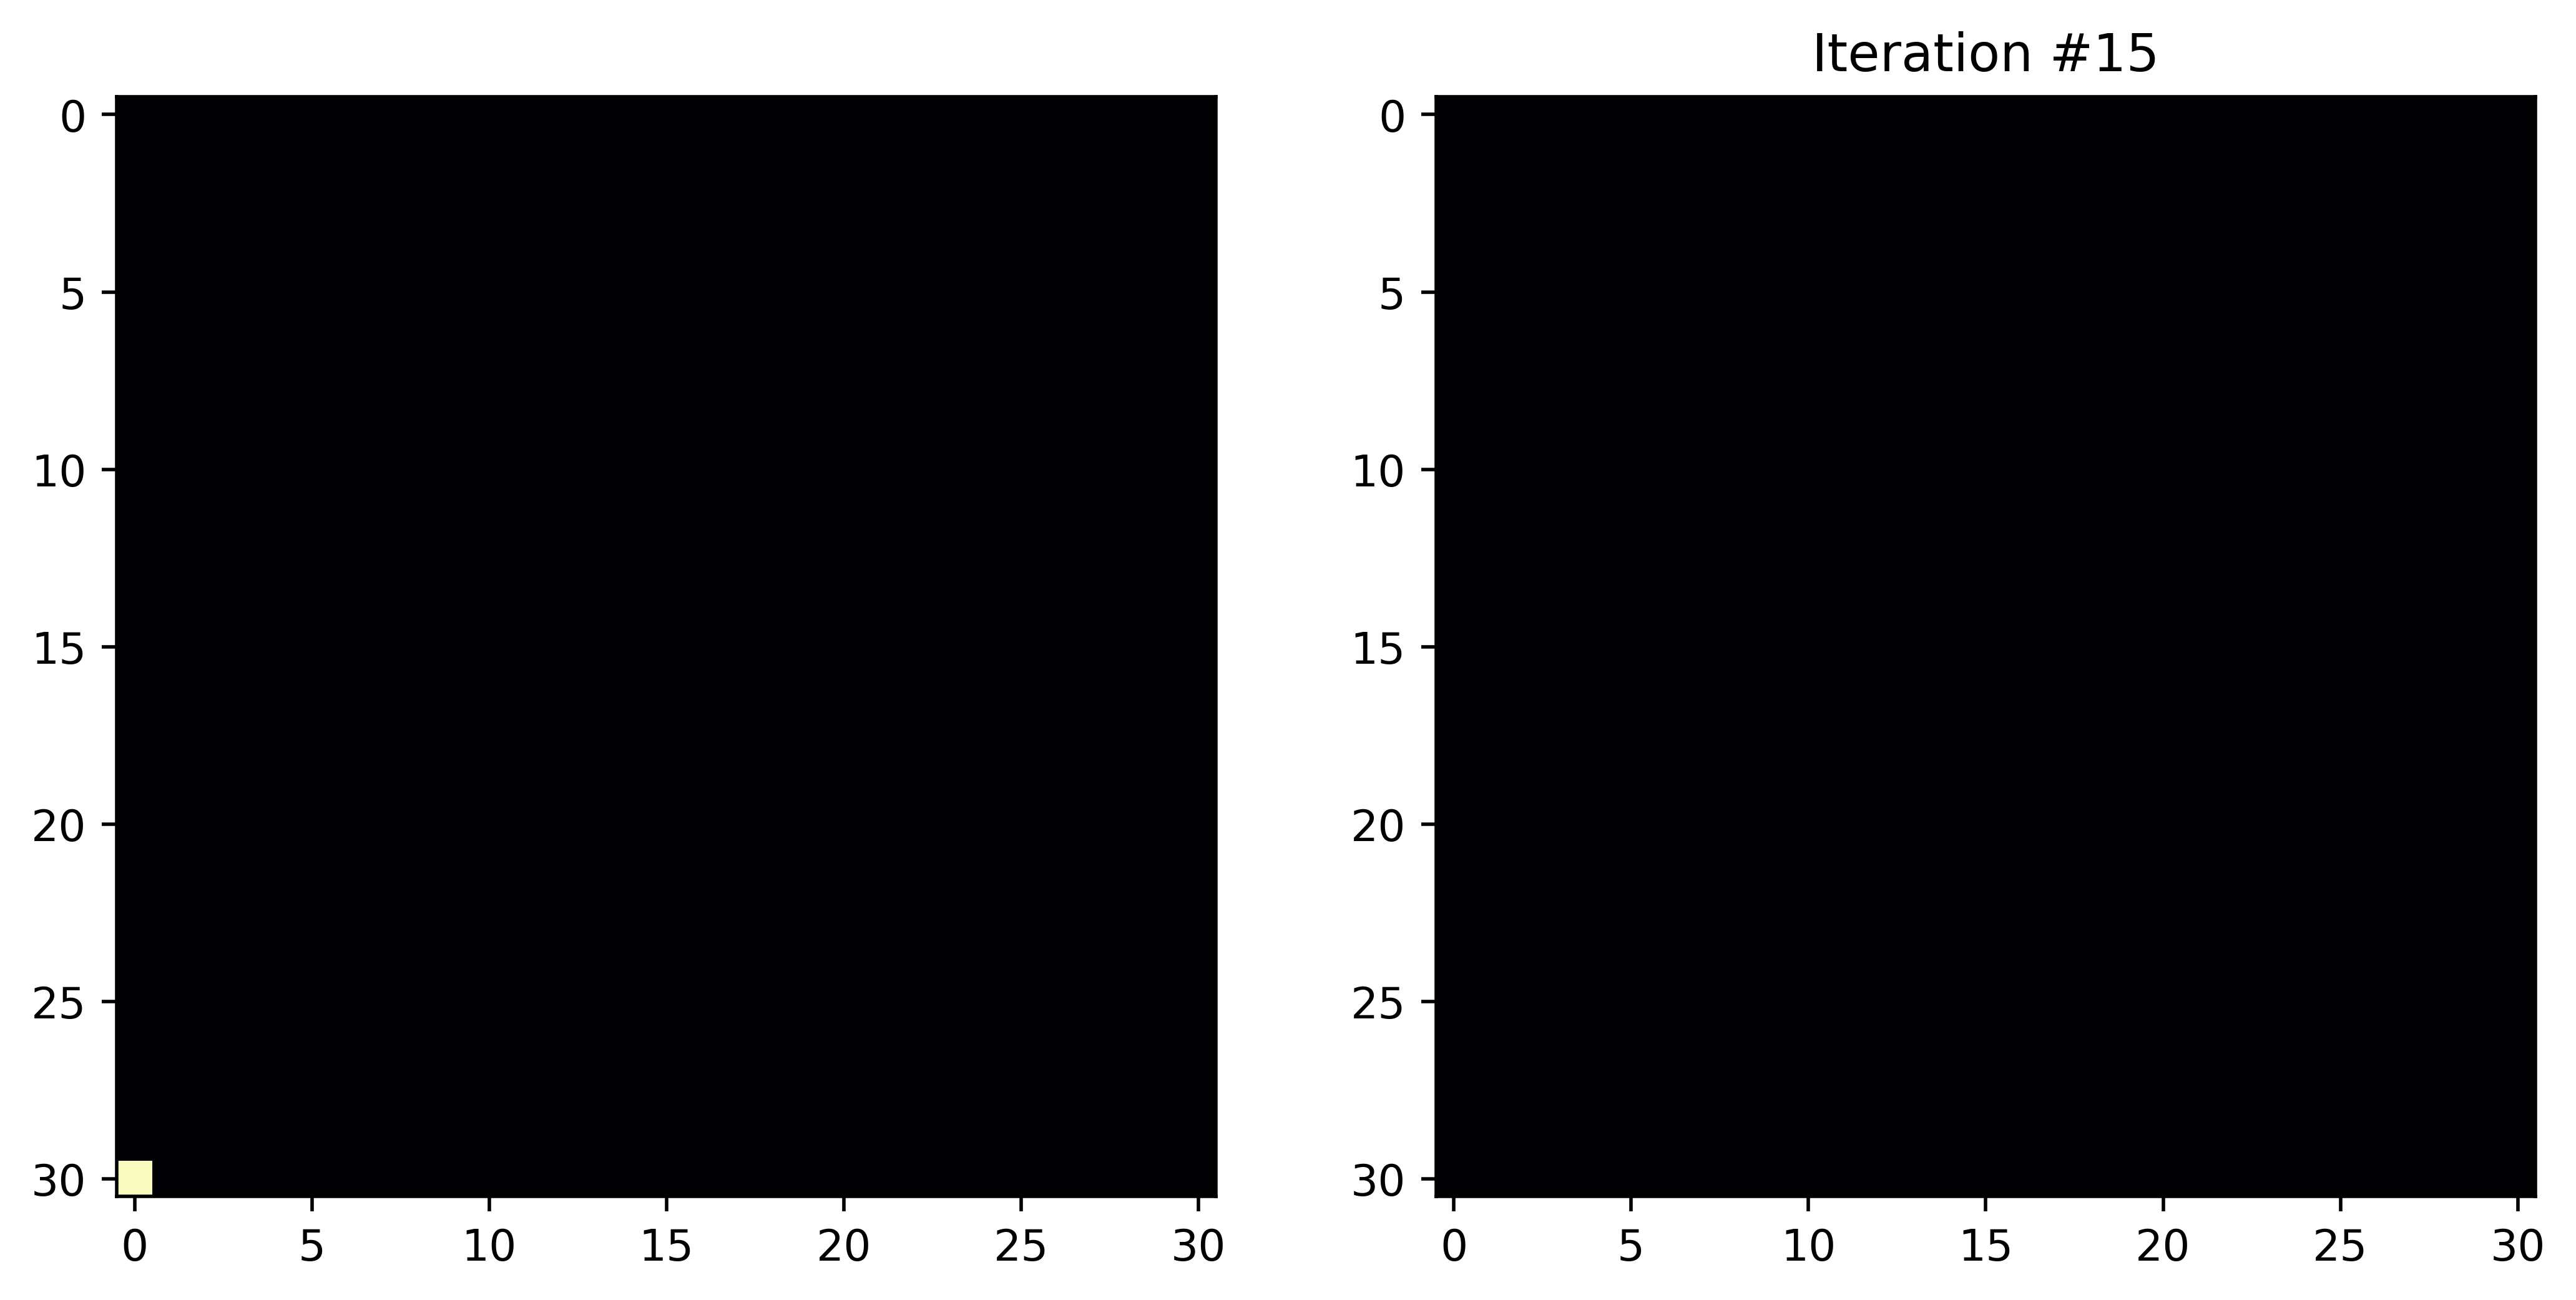

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]


In [5]:
n_it = 15 # NX * NY

x_list = []
x_roll_list = []
x_custom_list = []
x_diff_list = []

# Generate random array and save to list
# x0 = np.random.rand(NY, NX, NL)

src_pos = (NY-1,0)
# src_pos = (NY//2,NX//2)

# src_val = [1] * NL

src_val = [0] * NL
src_val[7] = 1
src_val[14] = 1
src_val[15] = 1

x0 = np.zeros((NY, NX, NL))
# x0[NY//2, NX//2] = src_val
x0[src_pos] = src_val

x_list.append(x0)
x_roll_list.append(x0)
x_custom_list.append(x0)

fig, ax = plt.subplots(1, 2, figsize=(10, 10), dpi=500)
ax[0].imshow(np.sum(x_roll_list[-1], axis=2), cmap="magma")
ax[1].imshow(np.sum(x_custom_list[-1], axis=2), cmap="magma")
plt.title(f"Iteration #0")
plt.show()

for it in range(n_it):
    # Perform streaming using using np.roll and save to list
    x = np.copy(x_roll_list[-1])
    x[src_pos] = src_val
    x_roll = stream_roll(x)
    # x_roll += x_roll_list[-1]
    x_roll_list.append(x_roll)

    # Perform streaming using custom method and save to list
    x = np.copy(x_custom_list[-1])
    x[src_pos] = src_val
    x_custom = stream_custom(x)
    # x_custom += x_custom_list[-1]
    x_custom_list.append(x_custom)

    # Calculate difference between results and save to list
    x_diff_list.append(x_custom - x_roll)

    # Plot results
    fig, ax = plt.subplots(1, 2, figsize=(10, 10), dpi=500)
    ax[0].imshow(np.sum(x_roll_list[-1], axis=2), cmap="magma")
    ax[1].imshow(np.sum(x_custom_list[-1], axis=2), cmap="magma")
    plt.title(f"Iteration #{it+1}")
    plt.show()

xp, yp = NX//2, NY//2
print(x_list[-1][xp, yp])
print(x_roll_list[-1][xp, yp])
print(x_custom_list[-1][xp, yp])

In [6]:
xf = x_list[0]

for dir_i, i_dir in enumerate(idxs_dir):
    cy = cys[i_dir]
    cx = cxs[i_dir]
    
    xf[:, :, i_dir] = np.roll(xf[:, :, i_dir], cx, axis=1)
    xf[:, :, i_dir] = np.roll(xf[:, :, i_dir], cy, axis=0)
    
    fig, ax = plt.subplots()
    plt.imshow(xf[:, :, dir_i], cmap="magma")
    plt.title(f"{i_dir} ({cx}, {cy})")
    ax.set_xticks(list(range(1, NX)))
    ax.set_yticks(list(range(1, NY)))